# Final Features extracted 


- label: This feature indicates whether the file is labeled as benign (False) or malicious (True).
- .textsize: This feature represents the size of the .text section in the PE file.
- .textentropy: This feature represents the entropy of the .text section in the PE file.
- .textvsize: This feature represents the virtual size of the .text section in the PE file.
- .datasize: This feature represents the size of the .data section in the PE file.
- .dataentropy: This feature represents the entropy of the .data section in the PE file.
- .datavsize: This feature represents the virtual size of the .data section in the PE file.
- .rsrcsize: This feature represents the size of the .rsrc section in the PE file.
- .rsrcentropy: This feature represents the entropy of the .rsrc section in the PE file.
- .rsrcvsize: This feature represents the virtual size of the .rsrc section in the PE file.
- machine: This feature represents the type of machine for which the file is intended.
- subsystem: This feature represents the target subsystem for the PE file.
- generalsize: This feature represents the size of the general file information in the PE header.
- generalvsize: This feature represents the virtual size of the general file information in the PE header.
- generalhas_debug: This feature indicates whether the PE file has a debug section (True) or not (False).
- generalexports: This feature represents the number of exported functions in the PE file.
- generalimports: This feature represents the number of imported functions in the PE file.
- generalhas_relocations: This feature indicates whether the PE file has relocation information (True) or not (False).
- generalhas_resources: This feature indicates whether the PE file has resource information (True) or not (False).
- generalhas_signature: This feature indicates whether the PE file has a digital signature (True) or not (False).
- generalhas_tls: This feature indicates whether the PE file has thread local storage (TLS) information (True) or not (False).
- generalsymbols: This feature represents the number of symbols in the PE file.
- stringsnumstrings: This feature represents the number of printable strings in the PE file.
- stringsavlength: This feature represents the average length of the printable strings in the PE file.
- stringsprintabledist: This feature represents the histogram of printable characters within the printable strings.
- stringsprintables: This feature indicates whether the PE file contains printable strings (True) or not (False).
- stringsentropy: This feature represents the entropy of characters across all printable strings.
- stringspaths: This feature represents the number of strings that begin with "C:\" indicating paths.
- stringsurls: This feature represents the number of strings that contain "http://" or "https://" indicating URLs.
- stringsregistry: This feature represents the number of strings that contain "HKEY_" indicating registry keys.
- stringsMZ: This feature represents the number of strings that contain "MZ" indicating Windows PE droppers or bundled executables.
- cofftimestamp: This feature represents the timestamp in the COFF header of the PE file.
- coffmachine: This feature represents the target machine for which the PE file is intended.
- coffcharacteristics: This feature represents a list of image characteristics of the PE file.
- optionalsubsystem: This feature represents the target subsystem specified in the optional header of the PE file.
- optionaldll_characteristics: This feature represents a list of DLL characteristics of the PE file.
- optionalmagic: This feature represents the magic value in the optional header of the PE file.
- optionalmajor_image_version: This feature represents the major image version specified in the optional header of the PE file.
- optionalminor_image_version: This feature represents the minor image version specified in the optional header of the PE file.
- optionalmajor_linker_version: This feature represents the major linker version specified in the optional header of the PE file.
- optionalminor_linker_version: This feature represents the minor linker version specified in the optional header of the PE file.
- optionalmajor_operating_system_version: This feature represents the major operating system version specified in the optional header of the PE file.
- optionalminor_operating_system_version: This feature represents the minor operating system version specified in the optional header of the PE file.
- optionalmajor_subsystem_version: This feature represents the major subsystem version specified in the optional header of the PE file.
- optionalminor_subsystem_version: This feature represents the minor subsystem version specified in the optional header of the PE file.
- optionalsizeof_code: This feature represents the size of the code section specified in the optional header of the PE file.
- optionalsizeof_headers: This feature represents the size of the headers specified in the optional header of the PE file.
- optionalsizeof_heap_commit: This feature represents the size of the committed heap specified in the optional header of the PE file.


# Dependencies

In [1]:
# %pip install scikit-learn 
# %pip install matplotlib
# %pip install scipy 
# %pip install keras 
# %pip install seaborn
# %pip install tensorflow
# %pip install scikeras
# %pip instlal joblib
# %pip install pydot



# Library Imports 


In [1]:
# import all the required libraries in this place

import json
import csv
import threading

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report ,precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split, learning_curve, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scikeras.wrappers import KerasClassifier

import xgboost as xgb
from scipy.stats import randint

import tensorflow as tf


from keras.models import Sequential
from keras.layers import Input, Dense, Activation, Dropout, Activation
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model
from keras import regularizers
from keras import backend as K
import sklearn.model_selection as model_selection
from sklearn.model_selection import StratifiedKFold

import joblib

import pydot




2023-09-22 03:56:07.492013: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-22 03:56:07.572753: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-22 03:56:08.473047: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Loading  Dataset


In [3]:
#Function to load data set
def load_dataset_from_jsonl(file_path, file_idx_start=0,file_idx_end=0,testing = False):
    dataset = []
    
    for i in range(file_idx_start,file_idx_end+1):
        path = file_path
        if not testing:
            path += '_' + str(i)
        path+= '.jsonl'
        with open(path, 'r') as file:
            for line in file:
                data = json.loads(line)
                dataset.append(data)
    return dataset


FILE_PATH_TRAINING = '../../dataset/ember2018/train_features'
FILE_PATH_TESTING = '../../dataset/ember2018/test_features'


dataset_training = load_dataset_from_jsonl(FILE_PATH_TRAINING,0,5)
dataset_testing = load_dataset_from_jsonl(FILE_PATH_TESTING,testing=True)




## Flattening the json objects


In [30]:
def extract_features(feature, feature_name, features):
    
    for key, value in feature.items(): 
        
        string_name = feature_name + '_' + key
        if string_name not in features:
            features[string_name]= []
        
        if isinstance(value, int) or isinstance(value, float):
            features[string_name].append(value)
        else:
            features[string_name].append(None)
    

def extract_features_from_dataset_to_dataframe(dataset):
    
    features= {}
    features['label']=[]

    section_names = ['.text', '.data', '.rsrc']
    feature_names = ['size', 'entropy', 'vsize']

    for section in section_names:
        for feature in feature_names:
            features[section +'_' + feature] = []

    features['machine']=[]
    features['subsystem']=[]


    for data in dataset:
        
        if data['label'] == -1:
            continue

        #all sections should be equal to 1    
        section_count_list = {'.text':0, '.data':0, '.rsrc':0}
        for item in data['section']['sections']:
            
            if item['name'] in section_names:
                section_count_list[item['name']]+=1
        
        check = False
        for key,value in section_count_list.items():
            if value!=1:
                check=True
                break
        
        if check:
            continue
            
        feature_names = ['size', 'entropy', 'vsize']
            
        for item in data['section']['sections']:

            if item['name'] in section_names:
                
                for feature in feature_names:
                    val = item[feature] if item[feature]!=None else None
                    features[item['name'] + '_' + feature].append(val)
        
        feature_names = ['general', 'strings']

        for feature in feature_names:
            extract_features(data[feature], feature,features)

        for item in data['header']:
            extract_features(data['header'][item], item,features)
        
        features['machine'].append(data['header']['coff']['machine'])
        features['subsystem'].append(data['header']['optional']['subsystem'])
        
        
        features['label'].append(data['label'])

    df = pd.DataFrame(features)
    print(df['label'].value_counts())
    return df


traning_data = extract_features_from_dataset_to_dataframe(dataset_training)
testing_data = extract_features_from_dataset_to_dataframe(dataset_testing)

label
0    157725
1    150733
Name: count, dtype: int64
label
0    57489
1    52790
Name: count, dtype: int64


In [35]:
df_training = traning_data
df_testing = testing_data

In [36]:
df_testing['subsystem'].replace('???','UNKNOWN',inplace=True)
df_training['subsystem'].replace('???','UNKNOWN',inplace=True)

In [37]:
for column in df_testing.columns:
  print("training",column)
  print(df_training[column].value_counts())
  print('-------\n')
  print("tesinting",column)
  print(df_testing[column].value_counts())
  print()
  print("---------------------------------------------------------------------------------------------------------\n")

training label
label
0    157725
1    150733
Name: count, dtype: int64
-------

tesinting label
label
0    57489
1    52790
Name: count, dtype: int64

---------------------------------------------------------------------------------------------------------

training .text_size
.text_size
262144      10685
169984       8156
6656         4887
761856       3974
4096         3850
            ...  
20132352        1
4400128         1
12588032        1
3291648         1
5459968         1
Name: count, Length: 10812, dtype: int64
-------

tesinting .text_size
.text_size
28672      3784
49152      3480
6656       2928
36864      2475
361472     2320
           ... 
1797120       1
1808896       1
7929856       1
6318080       1
1980416       1
Name: count, Length: 5848, dtype: int64

---------------------------------------------------------------------------------------------------------

training .text_entropy
.text_entropy
 6.640590    10482
 6.719869     8112
 6.610926     3930
 6.191553    

## Removing null columns from dataframes

In [38]:
df_training.dropna(how='all', axis=1, inplace=True)
df_testing.dropna(how='all', axis=1, inplace=True)

In [40]:
df_training.columns,df_testing.columns

(Index(['label', '.text_size', '.text_entropy', '.text_vsize', '.data_size',
        '.data_entropy', '.data_vsize', '.rsrc_size', '.rsrc_entropy',
        '.rsrc_vsize', 'machine', 'subsystem', 'general_size', 'general_vsize',
        'general_has_debug', 'general_exports', 'general_imports',
        'general_has_relocations', 'general_has_resources',
        'general_has_signature', 'general_has_tls', 'general_symbols',
        'strings_numstrings', 'strings_avlength', 'strings_printables',
        'strings_entropy', 'strings_paths', 'strings_urls', 'strings_registry',
        'strings_MZ', 'coff_timestamp', 'optional_major_image_version',
        'optional_minor_image_version', 'optional_major_linker_version',
        'optional_minor_linker_version',
        'optional_major_operating_system_version',
        'optional_minor_operating_system_version',
        'optional_major_subsystem_version', 'optional_minor_subsystem_version',
        'optional_sizeof_code', 'optional_sizeof_heade

## Encoding non integer columns

In [41]:

columns_to_encode = ['machine', 'subsystem']

df_training = pd.get_dummies(df_training, columns=columns_to_encode)
df_testing = pd.get_dummies(df_testing, columns=columns_to_encode)


In [42]:
print("In training diff",df_training.columns.difference(df_testing.columns))
print("In testing diff",df_testing.columns.difference(df_training.columns))

In training diff Index(['machine_MIPSFPU', 'machine_SH4', 'subsystem_POSIX_CUI'], dtype='object')
In testing diff Index([], dtype='object')


## Adding the columns

In [43]:
for column in df_training.columns.difference(df_testing.columns):
    df_testing[column] = 0  
    
for column in df_testing.columns.difference(df_training.columns):
  df_training[column]= 0
  
df_testing = df_testing[df_training.columns]

In [8]:
df_training.columns

Index(['label', '.text_size', '.text_entropy', '.text_vsize', '.data_size',
       '.data_entropy', '.data_vsize', '.rsrc_size', '.rsrc_entropy',
       '.rsrc_vsize', 'general_size', 'general_vsize', 'general_has_debug',
       'general_exports', 'general_imports', 'general_has_relocations',
       'general_has_resources', 'general_has_signature', 'general_has_tls',
       'general_symbols', 'strings_numstrings', 'strings_avlength',
       'strings_printables', 'strings_entropy', 'strings_paths',
       'strings_urls', 'strings_registry', 'strings_MZ', 'coff_timestamp',
       'optional_major_image_version', 'optional_minor_image_version',
       'optional_major_linker_version', 'optional_minor_linker_version',
       'optional_major_operating_system_version',
       'optional_minor_operating_system_version',
       'optional_major_subsystem_version', 'optional_minor_subsystem_version',
       'optional_sizeof_code', 'optional_sizeof_headers',
       'optional_sizeof_heap_commit', 'ma

## Standardization

In [45]:
# Columns to exclude from standardization
def standardize(df,df_train_fit):
    scaler = StandardScaler()
    exclude_columns= [
    "machine", "subsystem", "label"
    ]

    df_standardized = df.copy()

    for column in df.columns:
        if all([ x not in column for x in exclude_columns]):
            # Standardize the column
            scaler = scaler.fit(df_train_fit[column].values.reshape(-1, 1))
            df_standardized[column] = scaler.transform(df[column].values.reshape(-1, 1))

    return df_standardized

df_training_standardized = standardize(df_training,df_training)
df_testing_standardized = standardize(df_testing,df_training)

## Saving to csv 

In [46]:
df_training.to_csv('../filtered-data/original/training.csv',index= False)
df_testing.to_csv('../filtered-data/original/testing.csv',index= False)
df_training_standardized.to_csv('../filtered-data/standardized/training.csv',index= False)
df_testing_standardized.to_csv('../filtered-data/standardized/testing.csv',index= False)

In [47]:

# for column_name in df_training.columns:
#     print(column_name)
print(df_training.columns.difference(df_testing.columns))
print(df_testing.columns.difference(df_training.columns))

print(df_training_standardized.columns.difference(df_testing_standardized.columns))
print(df_testing_standardized.columns.difference(df_training_standardized.columns))

Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')


# Column distributions

In [14]:
print("Training",df_training.var(),sep = "\n")

label                                 0.249872
.text_size                            1.000003
.text_entropy                         1.000003
.text_vsize                           1.000003
.data_size                            1.000003
                                        ...   
subsystem_UNKNOWN                     0.000036
subsystem_WINDOWS_BOOT_APPLICATION    0.000301
subsystem_WINDOWS_CE_GUI              0.000593
subsystem_WINDOWS_CUI                 0.088232
subsystem_WINDOWS_GUI                 0.097899
Length: 61, dtype: float64

In [15]:
df_training.describe()

,label,.text_size,.text_entropy,.text_vsize,.data_size,.data_entropy,.data_vsize,.rsrc_size,.rsrc_entropy,.rsrc_vsize,...,optional_minor_image_version,optional_major_linker_version,optional_minor_linker_version,optional_major_operating_system_version,optional_minor_operating_system_version,optional_major_subsystem_version,optional_minor_subsystem_version,optional_sizeof_code,optional_sizeof_headers,optional_sizeof_heap_commit
count,308458.000000,3.084580e+05,3.084580e+05,3.084580e+05,3.084580e+05,3.084580e+05,3.084580e+05,3.084580e+05,3.084580e+05,3.084580e+05,...,3.084580e+05,3.084580e+05,3.084580e+05,3.084580e+05,3.084580e+05,308458.000000,308458.000000,3.084580e+05,3.084580e+05,3.084580e+05
mean,0.488666,2.395673e-17,-1.273208e-15,6.265606e-18,3.271015e-17,5.933897e-17,4.114107e-17,1.142552e-17,1.990251e-17,3.667222e-17,...,7.015405e-17,-1.022768e-16,-1.179408e-17,5.376443e-17,3.948253e-17,4.878564,0.619848,3.540528e-17,4.469427e-17,3.510582e-17
std,0.499872,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.450776,117.543856,1.000002e+00,1.000002e+00,1.000002e+00
min,0.000000,-3.108247e-01,-6.688324e+00,-3.024155e-01,-1.571404e-01,-1.661430e+00,-6.819539e-02,-1.178607e-01,-2.667005e+00,-1.176910e-01,...,-3.359429e-02,-1.322507e+00,-4.807675e-01,-1.984817e-02,-8.700947e-03,0.000000,0.000000,-3.088881e-02,-6.592993e-02,-3.626558e-03
25%,0.000000,-2.917465e-01,-7.112721e-02,-2.838069e-01,-1.523223e-01,-6.638235e-01,-6.765576e-02,-1.169476e-01,-6.313558e-01,-1.170898e-01,...,-3.359429e-02,-4.461515e-01,-4.807675e-01,-9.145315e-03,-8.700947e-03,4.000000,0.000000,-3.003144e-02,-3.167555e-02,-2.618226e-03
50%,0.000000,-2.306368e-01,2.150856e-01,-2.253012e-01,-1.450951e-01,1.586481e-01,-6.649281e-02,-1.123816e-01,-4.843349e-02,-1.119996e-01,...,-3.359429e-02,-7.973976e-03,-4.807675e-01,-6.469602e-03,-8.700947e-03,5.000000,0.000000,-2.740963e-02,-3.167555e-02,-2.618226e-03
75%,1.000000,-8.904121e-02,3.627305e-01,-8.236268e-02,-1.222089e-01,6.904802e-01,-5.837204e-02,-7.494070e-02,6.008797e-01,-7.502452e-02,...,-3.359429e-02,4.302036e-01,3.090054e-01,-6.469602e-03,3.234297e-04,5.000000,1.000000,-2.097313e-02,-3.167555e-02,-2.618226e-03
max,1.000000,4.530711e+01,1.813260e+00,1.470166e+02,9.705372e+01,2.394861e+00,8.276163e+01,1.561898e+02,1.652883e+00,1.557497e+02,...,9.702215e+01,3.592258e+01,1.782760e+01,1.753330e+02,2.957111e+02,501.000000,65280.000000,1.041233e+02,2.371114e+02,5.104991e+02


/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


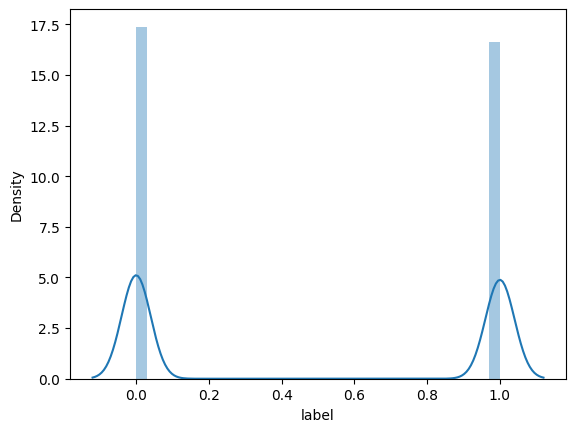

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


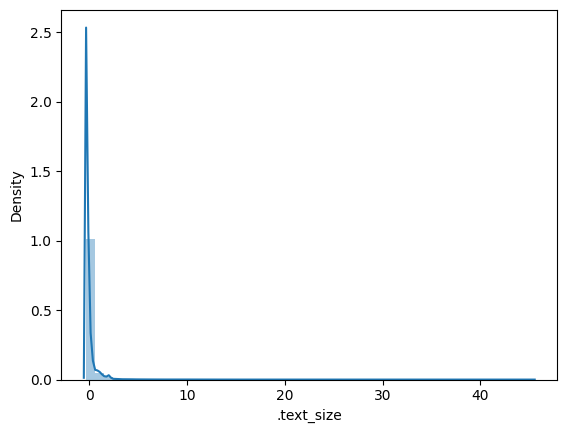

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


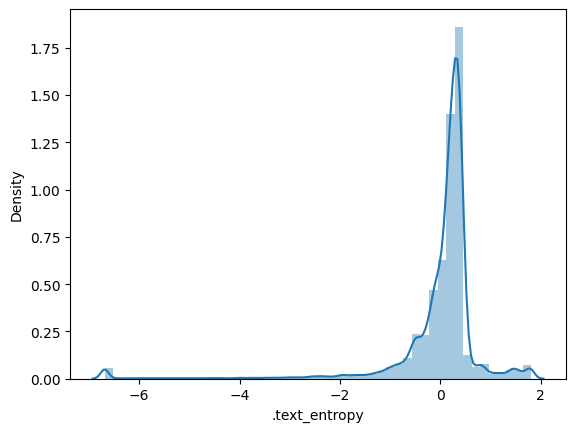

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


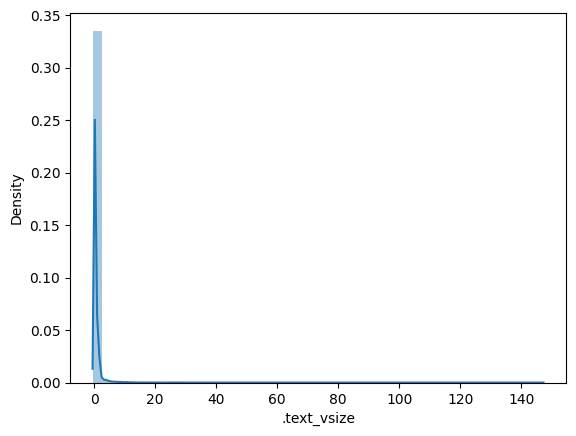

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


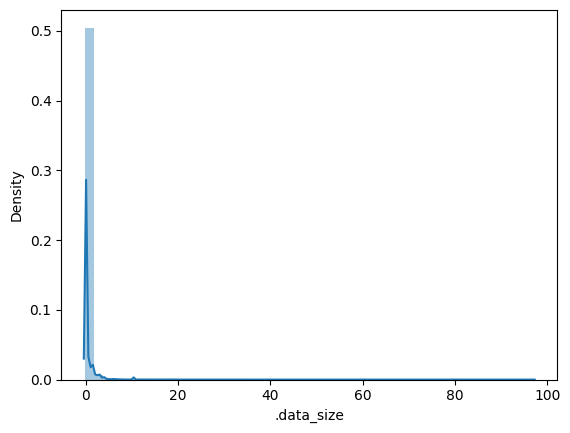

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


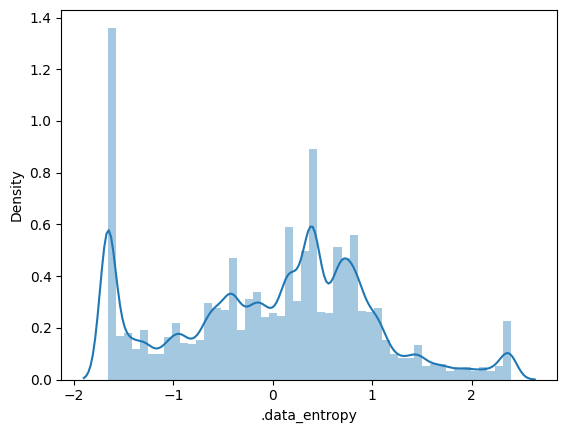

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


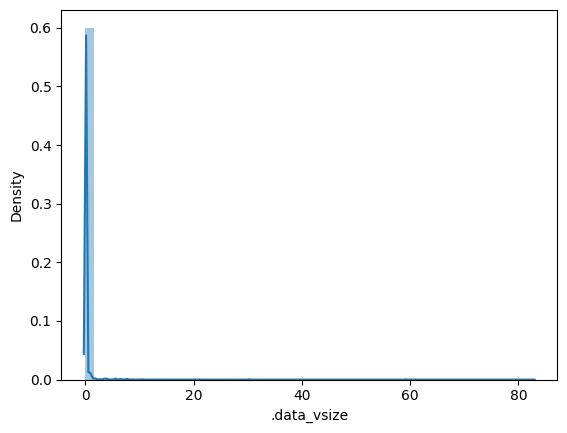

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


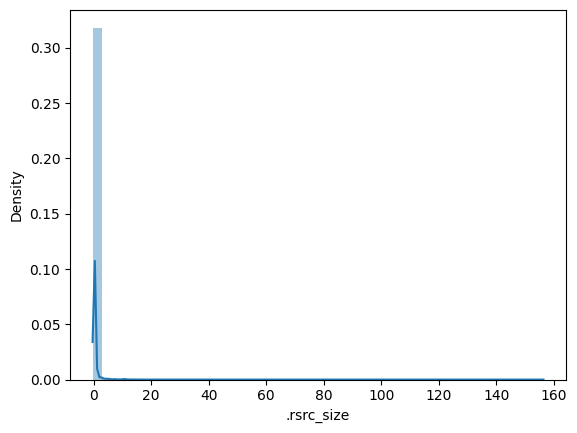

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


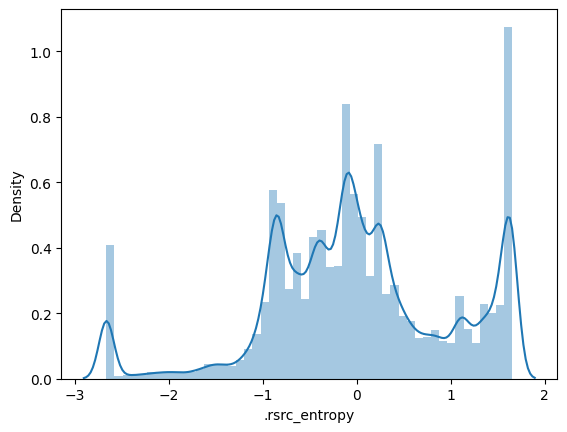

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


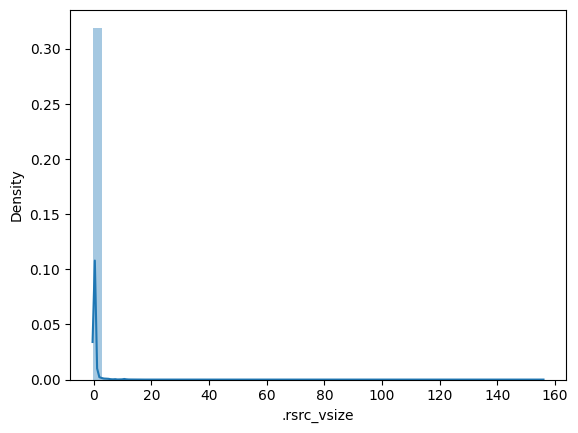

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


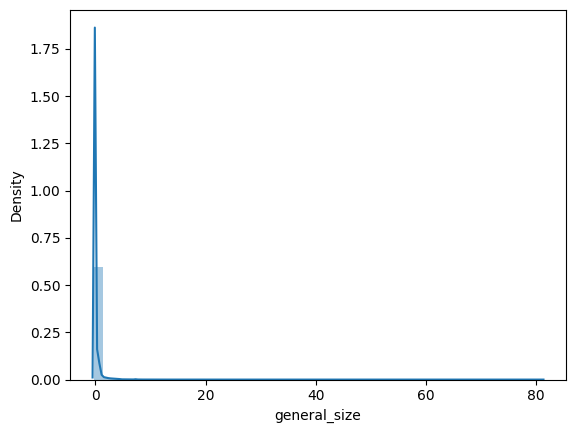

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


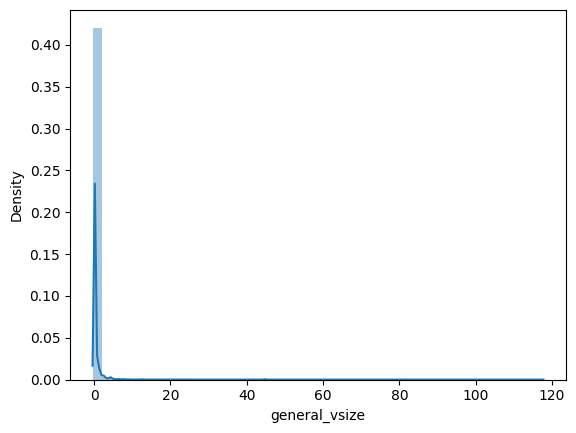

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


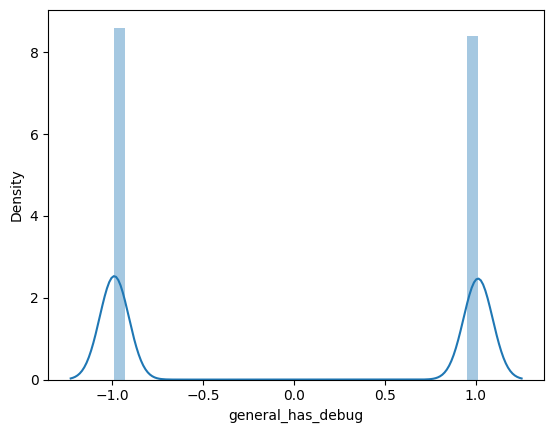

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


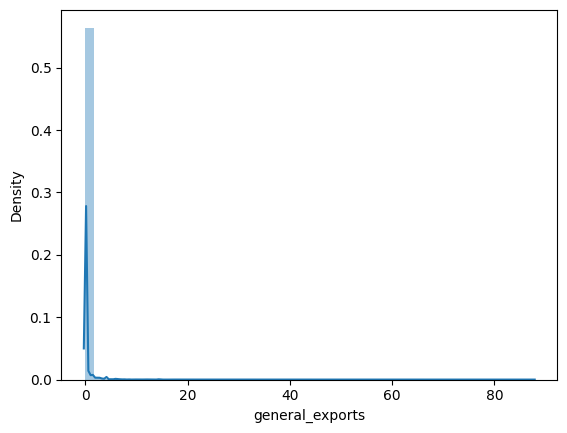

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


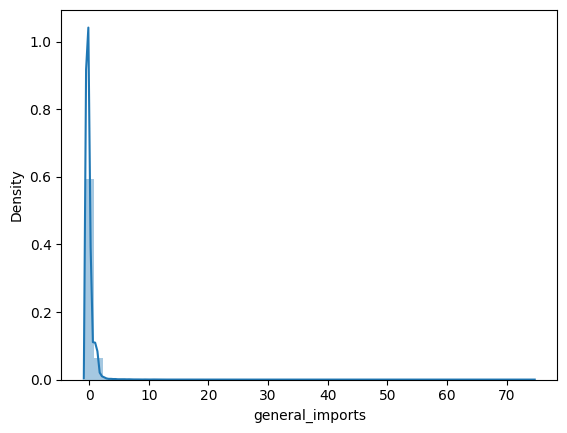

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


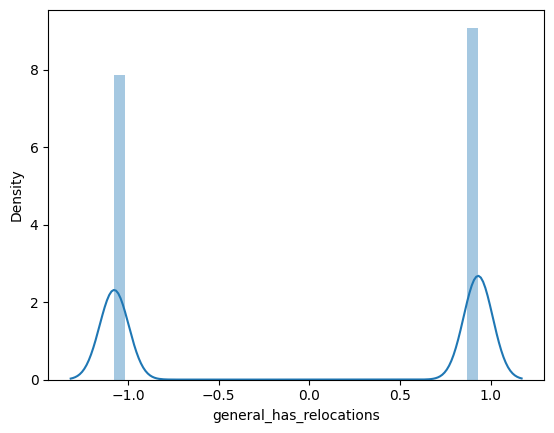

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


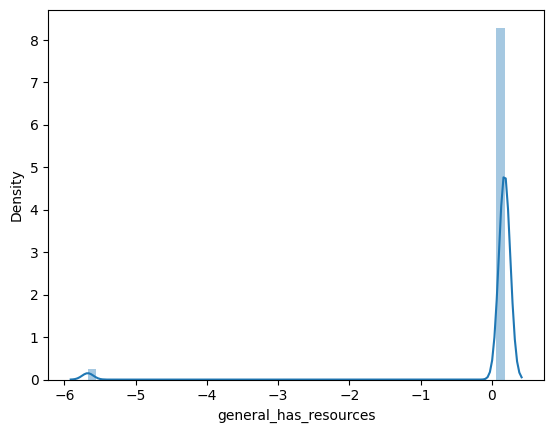

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


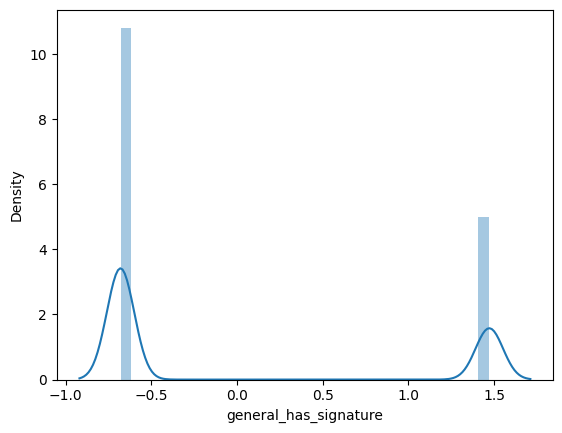

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


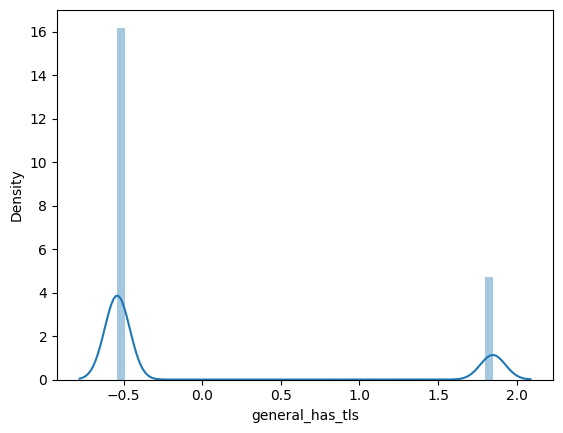

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


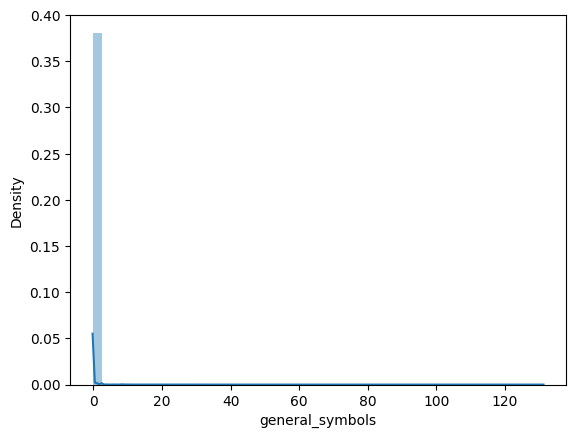

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


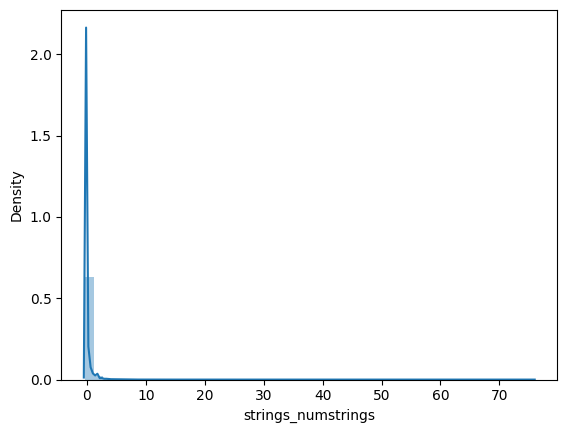

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


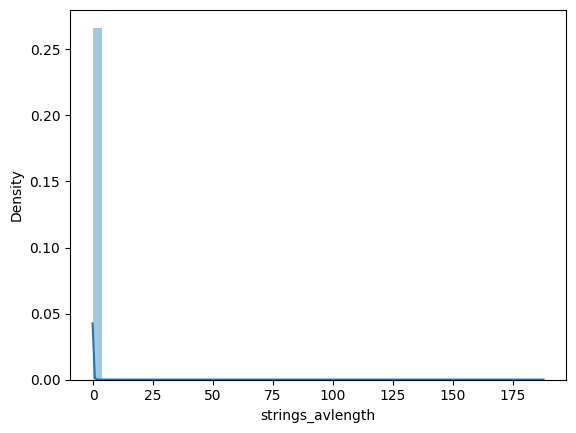

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


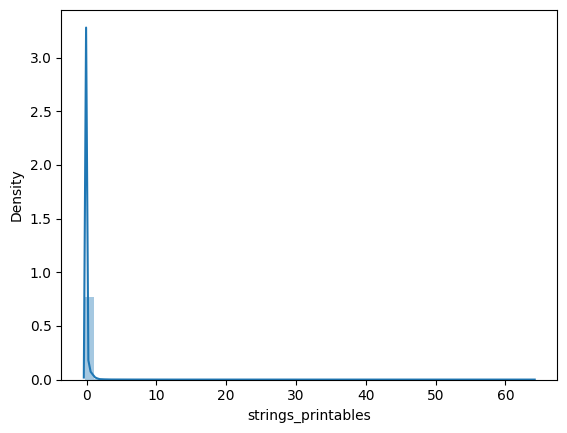

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


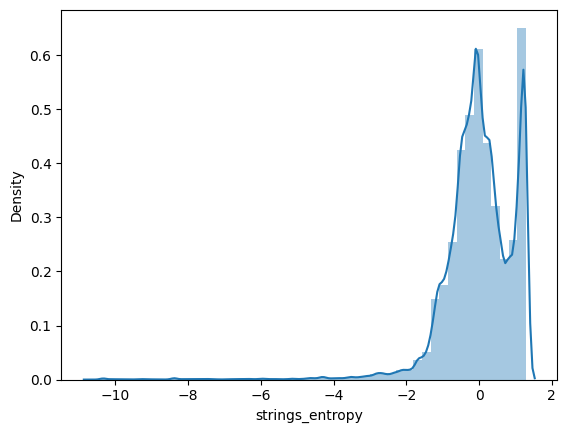

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


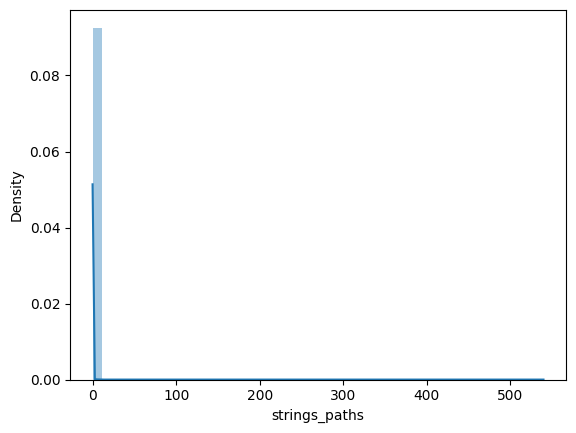

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


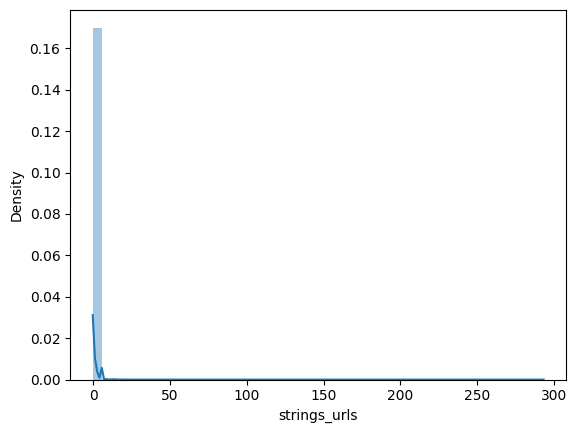

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


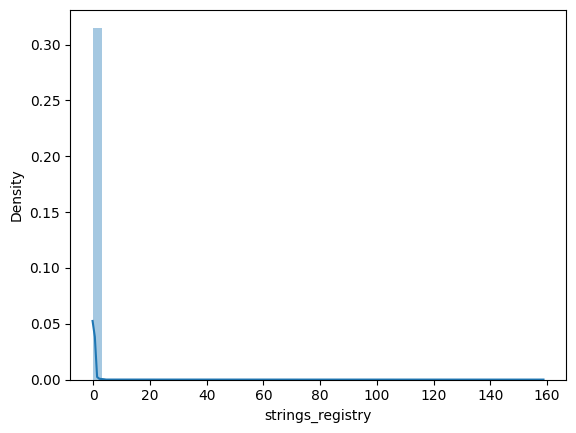

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


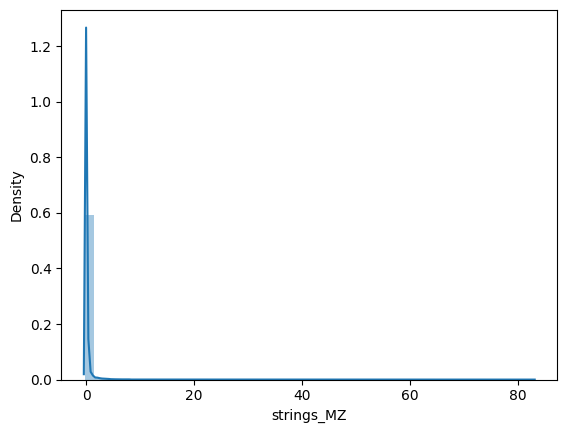

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


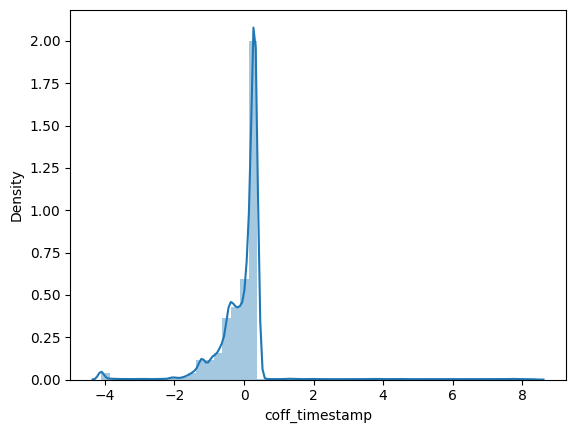

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


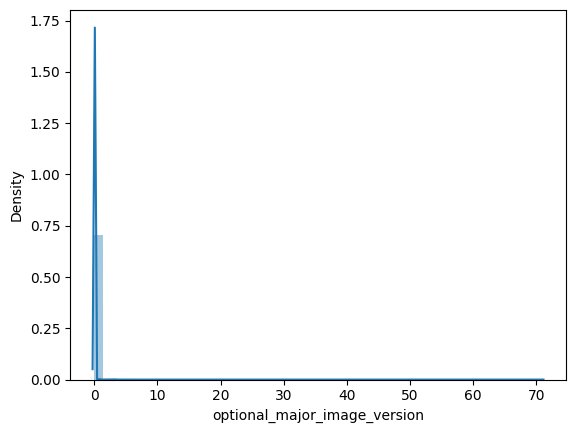

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


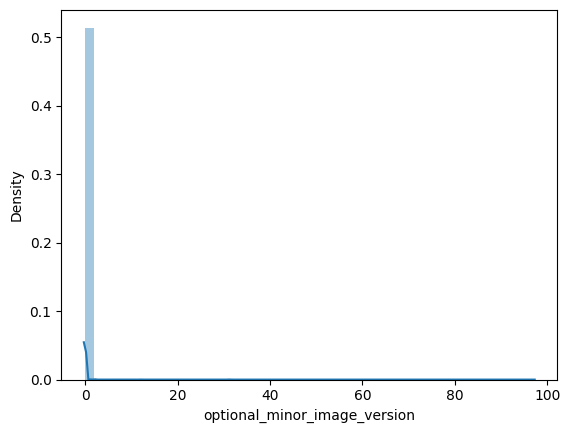

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


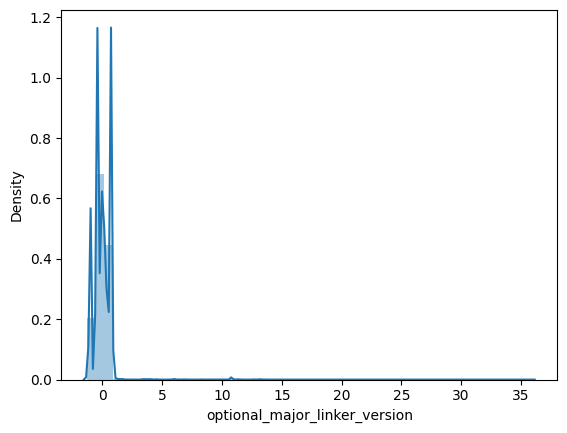

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


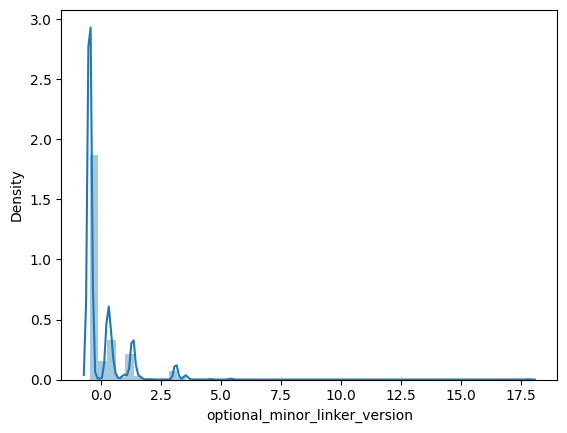

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


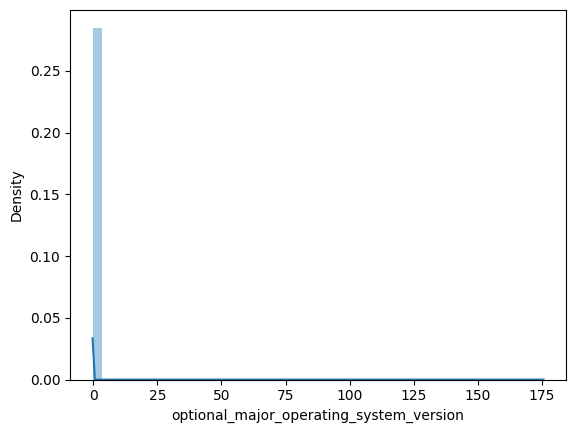

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


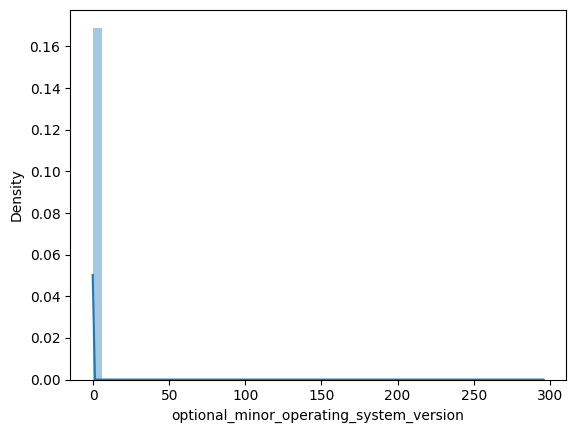

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


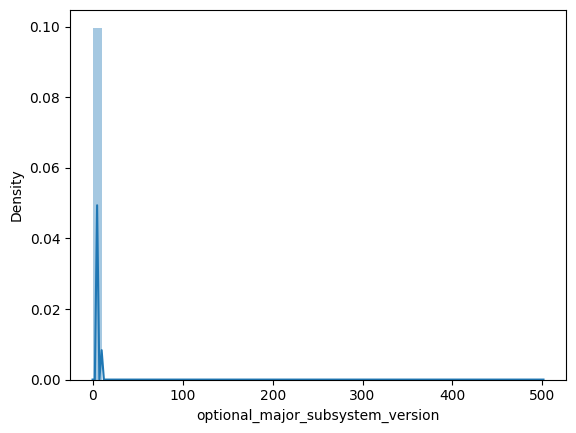

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


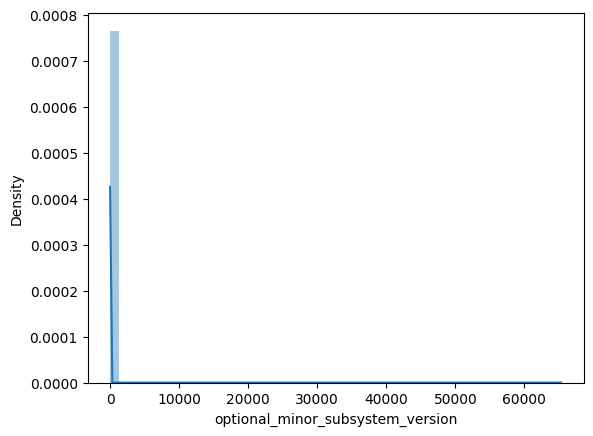

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


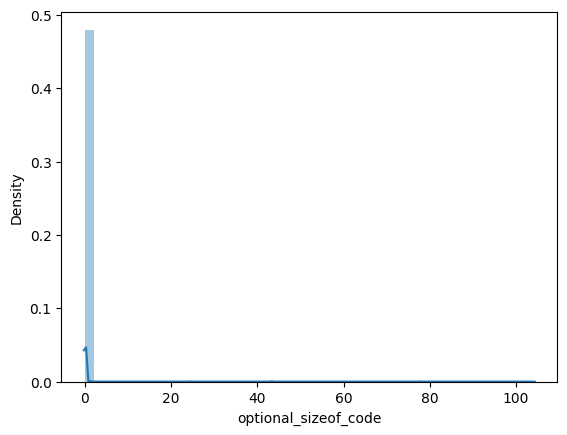

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


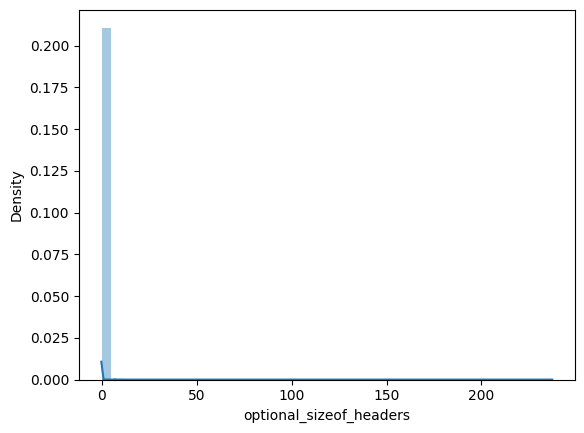

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


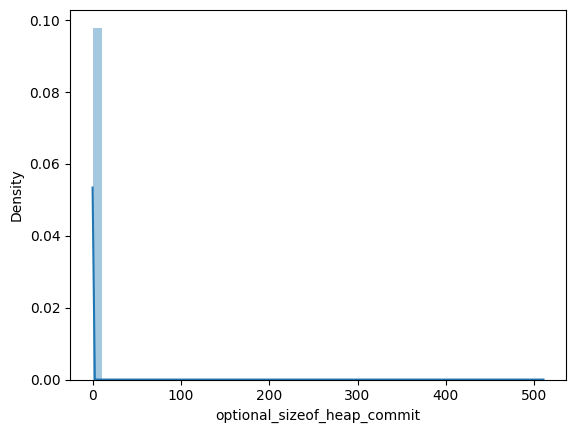

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


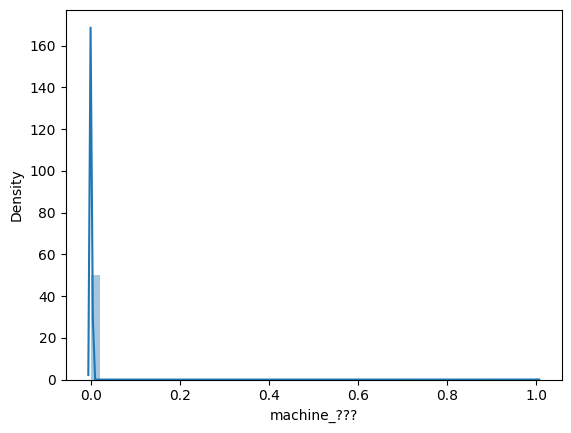

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


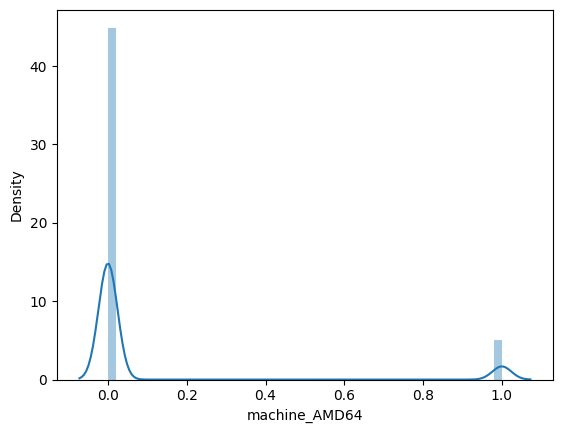

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


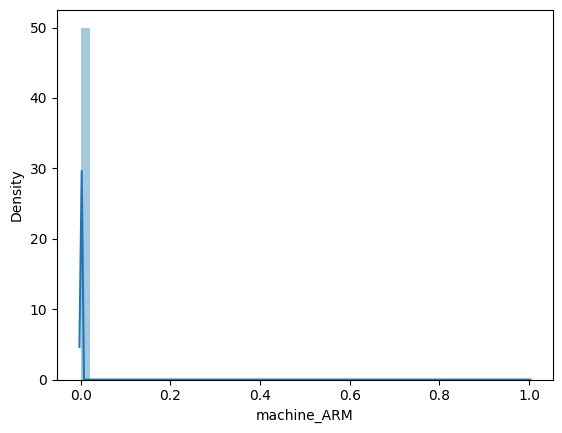

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


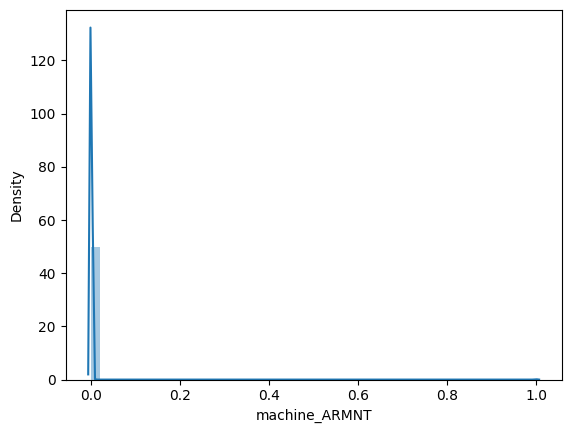

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


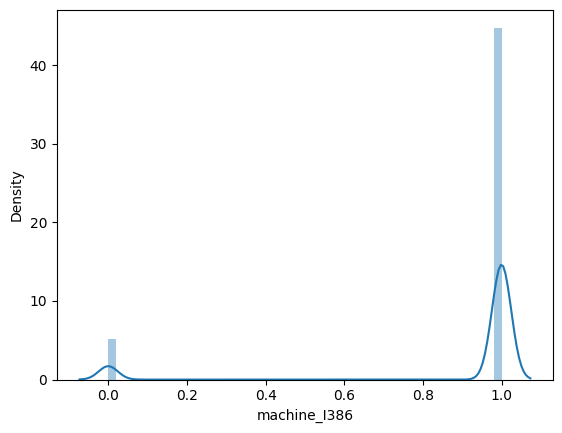

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


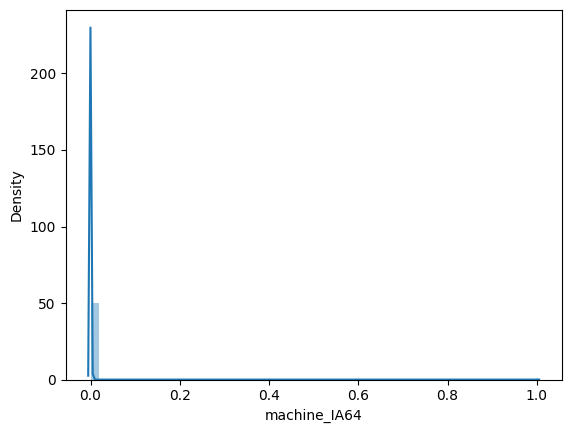

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


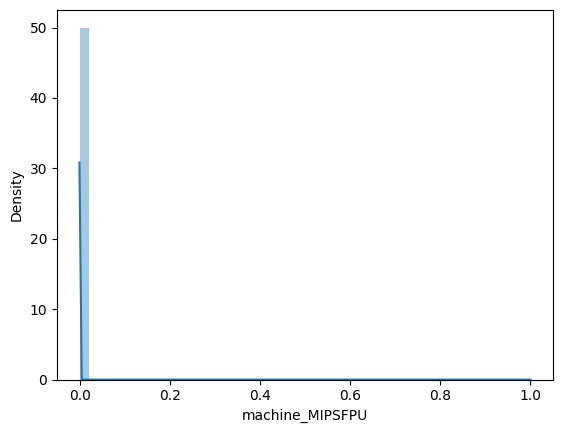

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


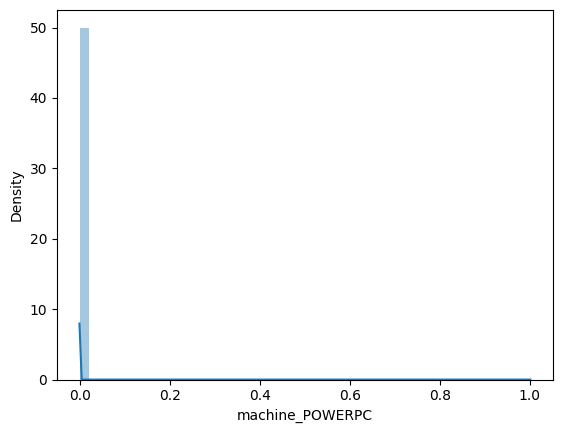

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


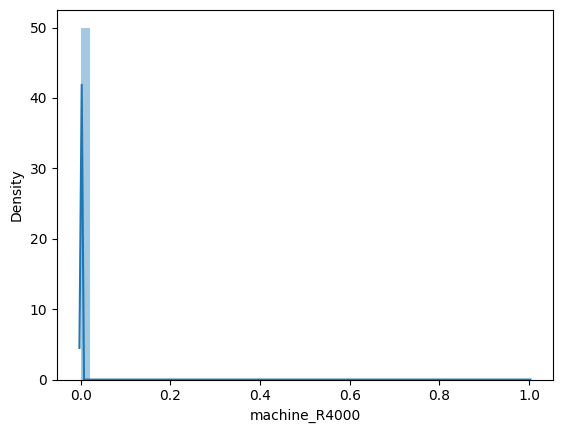

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


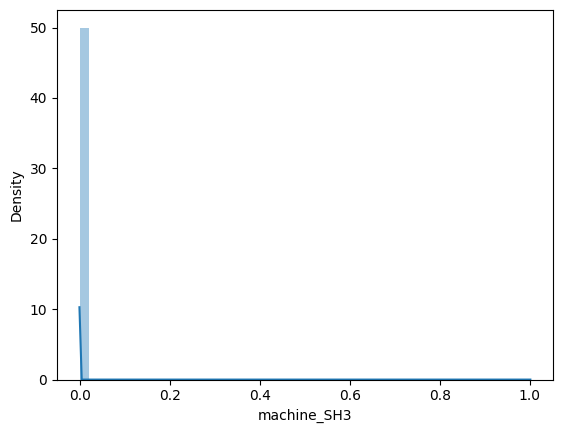

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


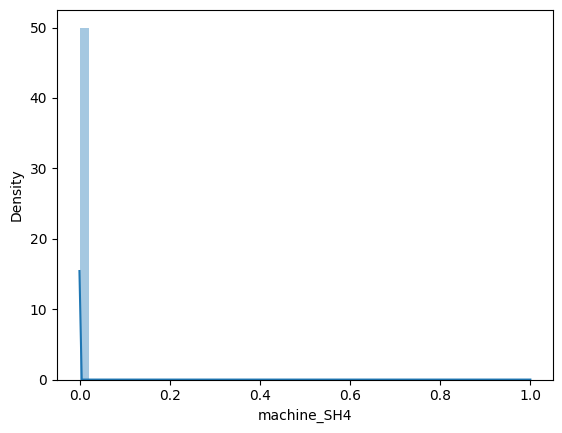

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


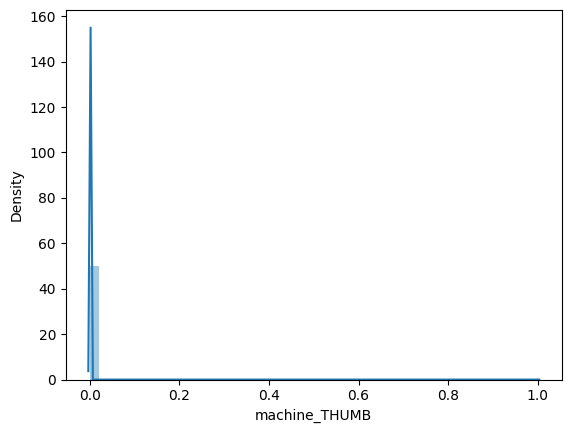

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


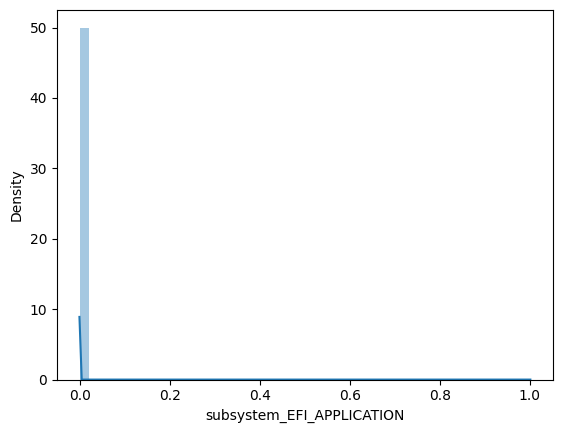

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


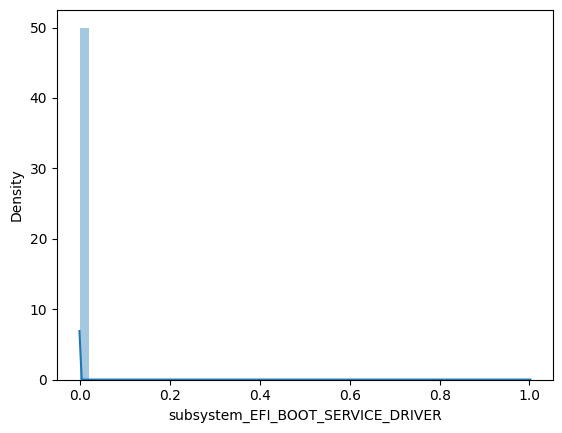

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


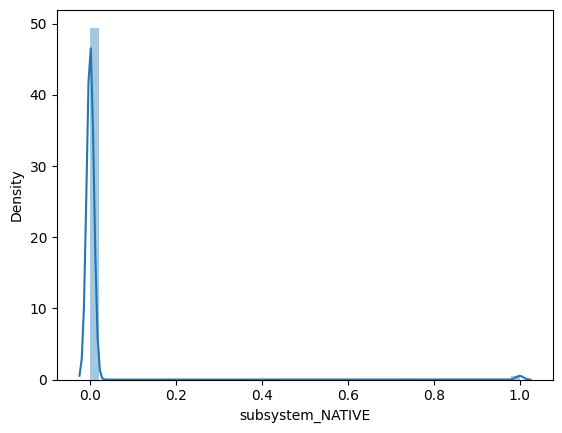

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


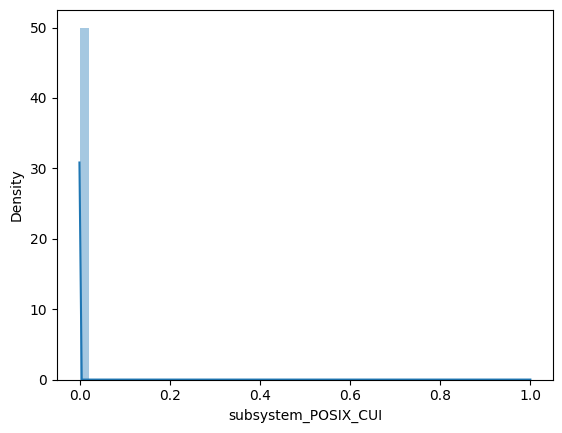

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


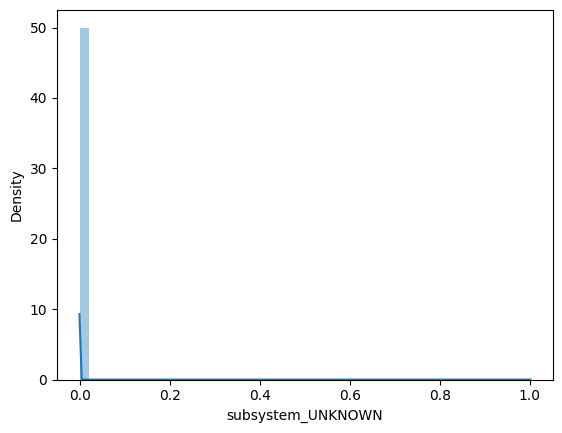

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


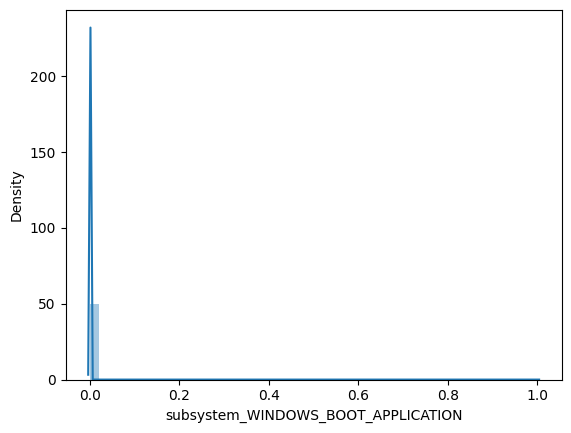

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


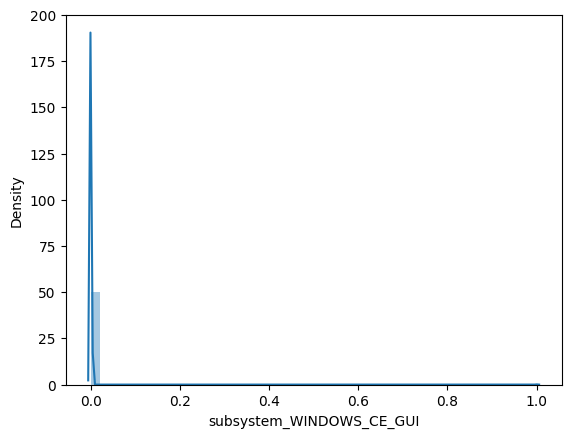

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


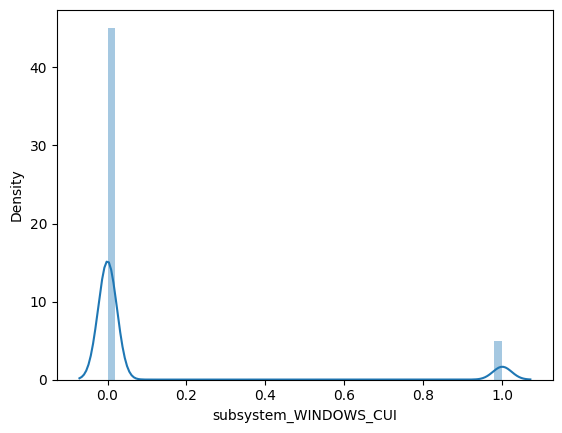

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


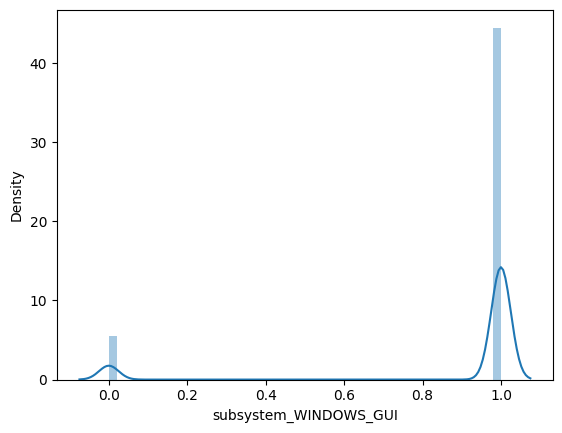

In [9]:
#plot normal distribution of features
def plot_normal_distribution(df):
    for column in df.columns:
        sns.distplot(df[column])
        plt.show()
        
plot_normal_distribution(df_training)

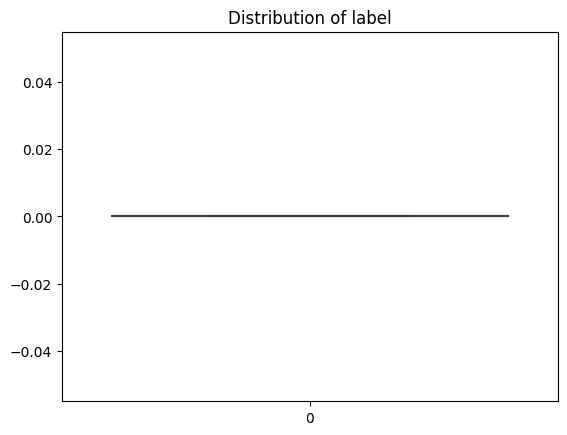

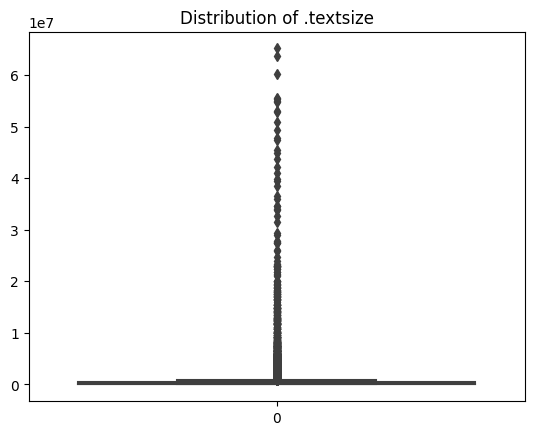

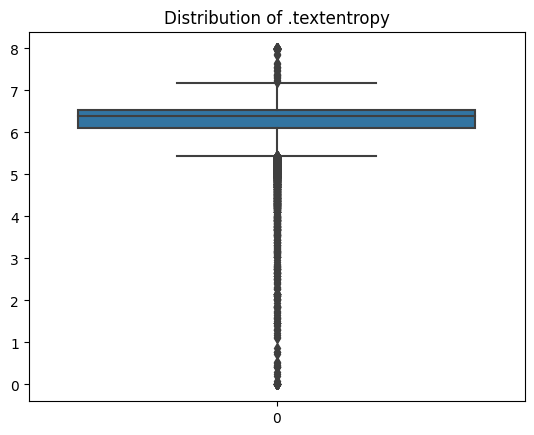

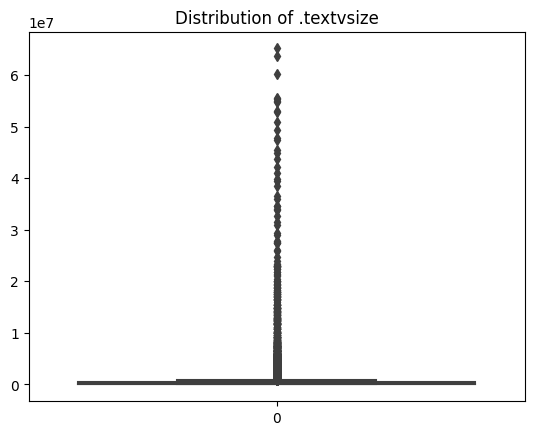

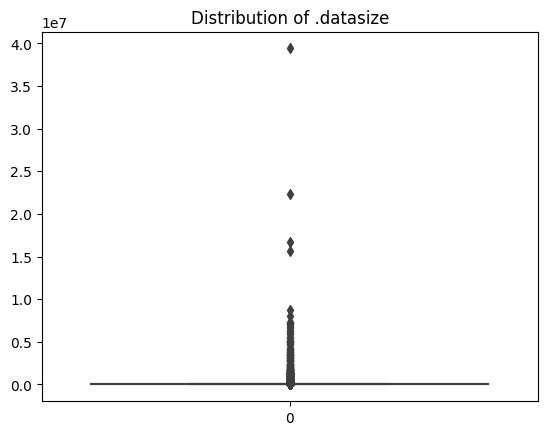

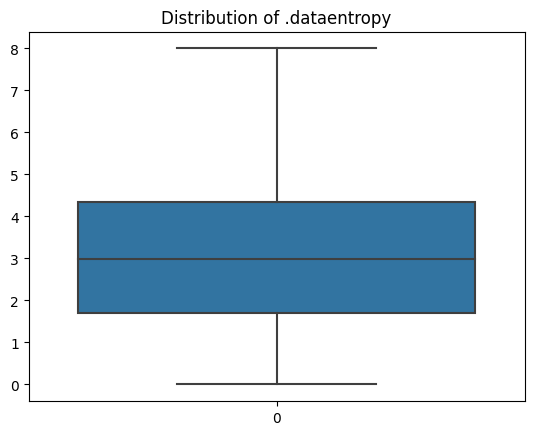

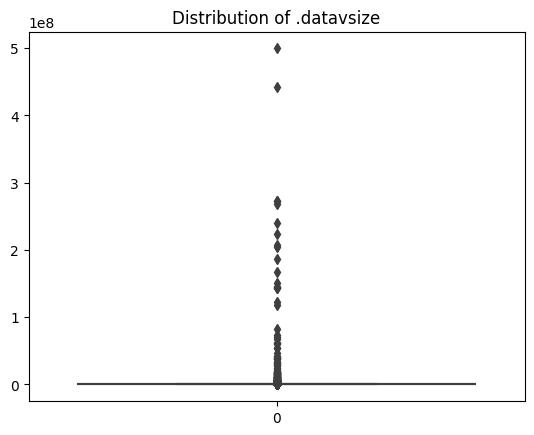

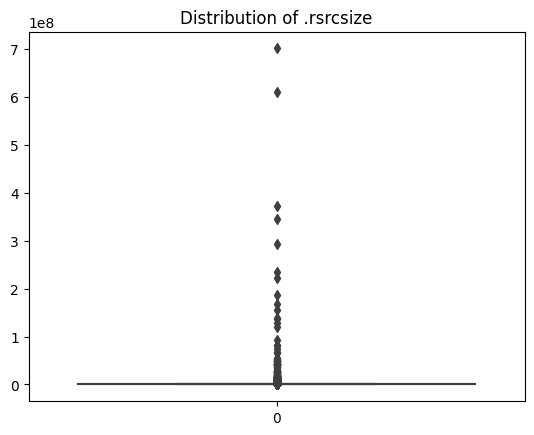

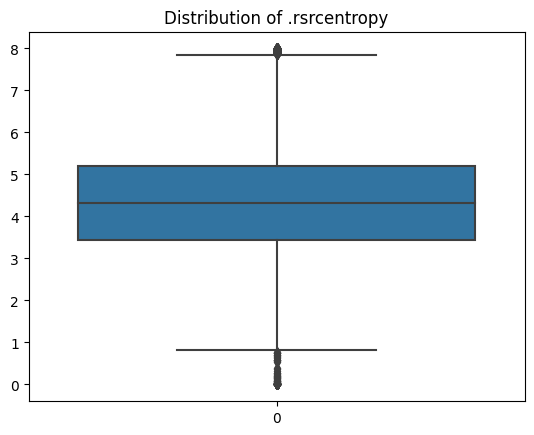

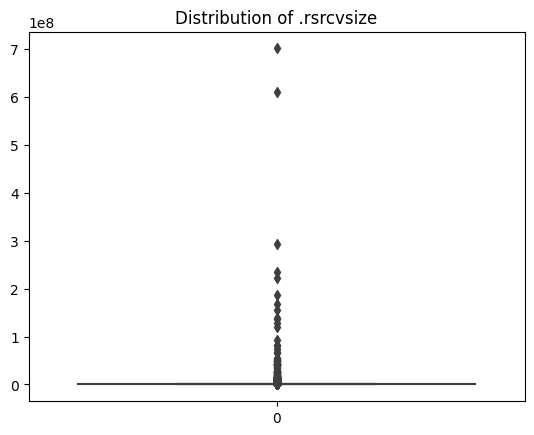

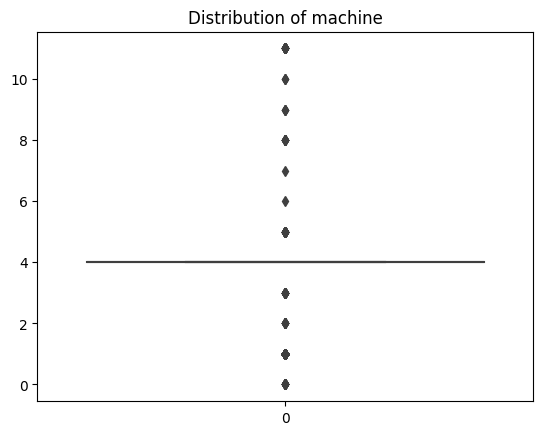

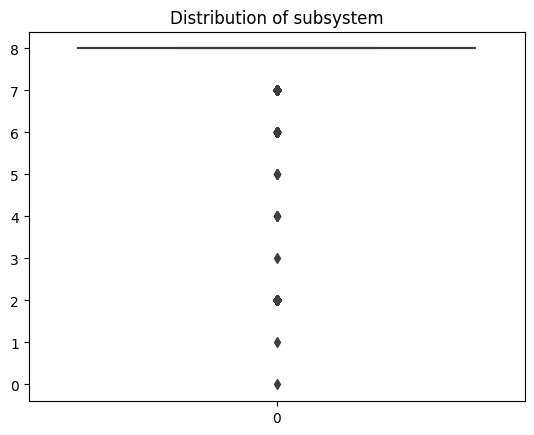

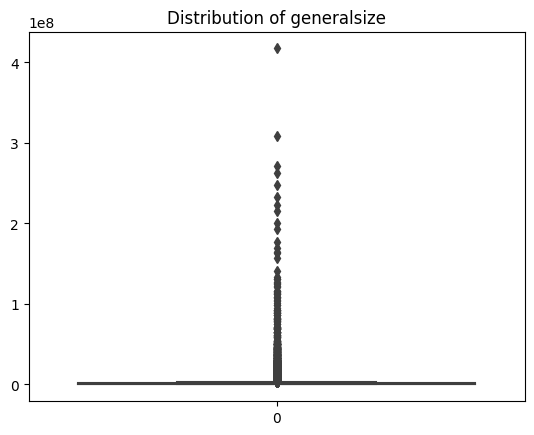

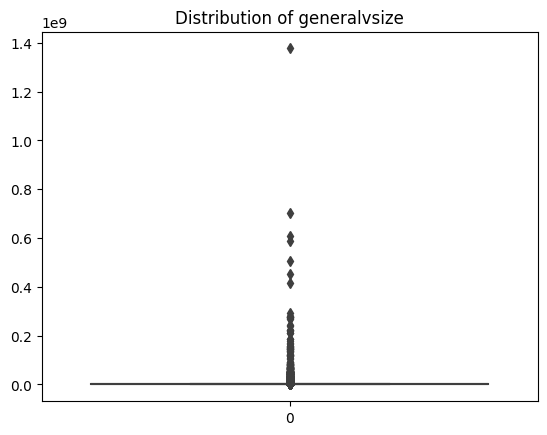

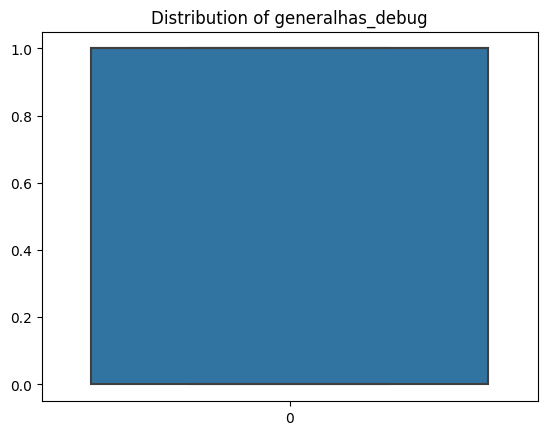

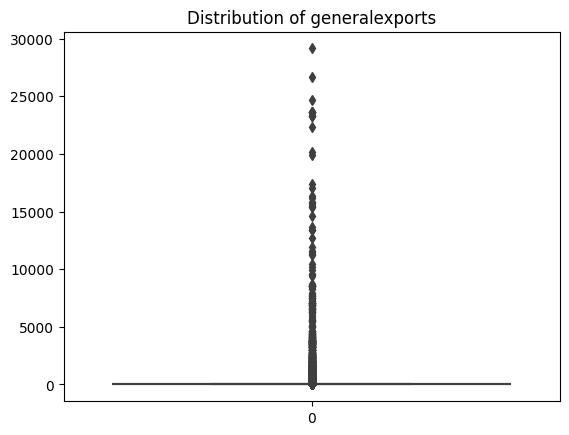

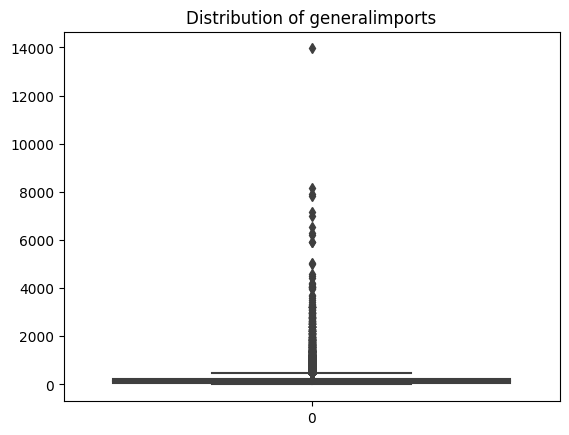

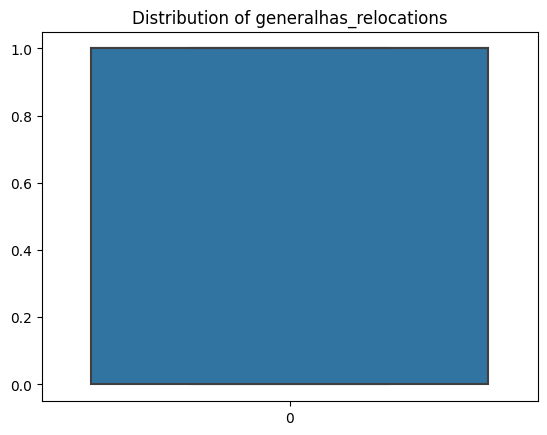

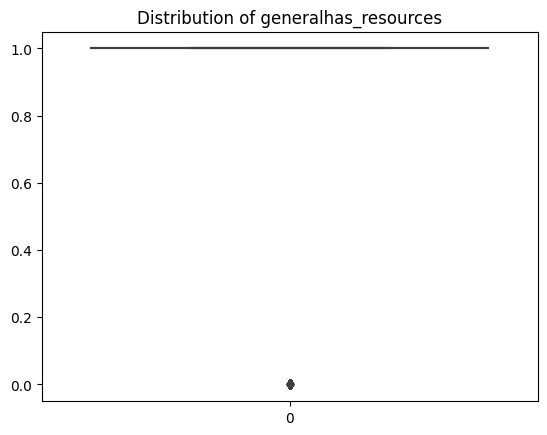

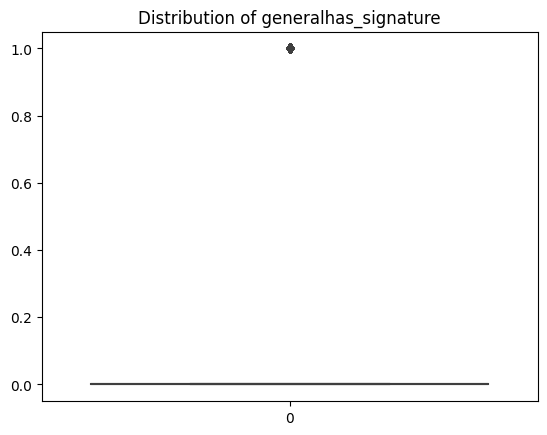

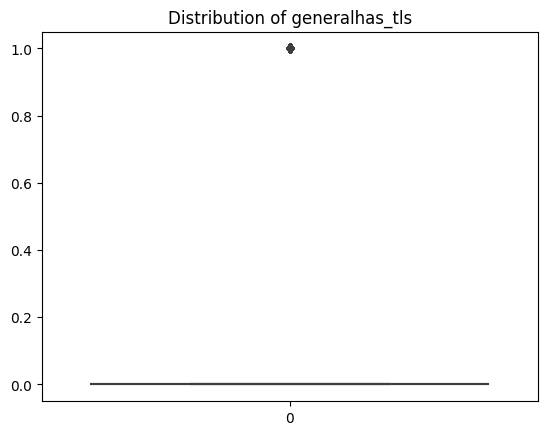

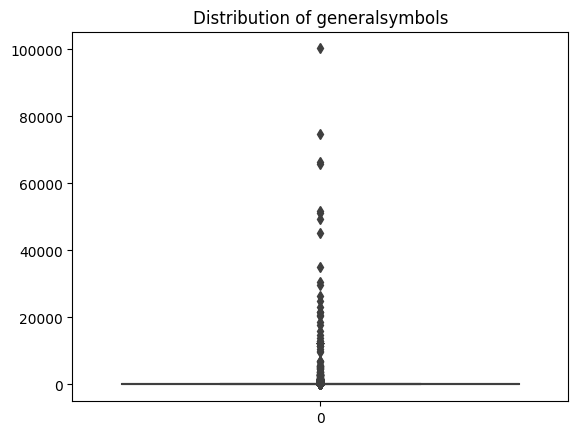

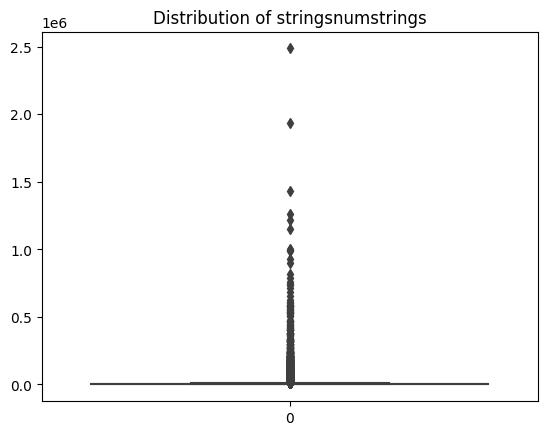

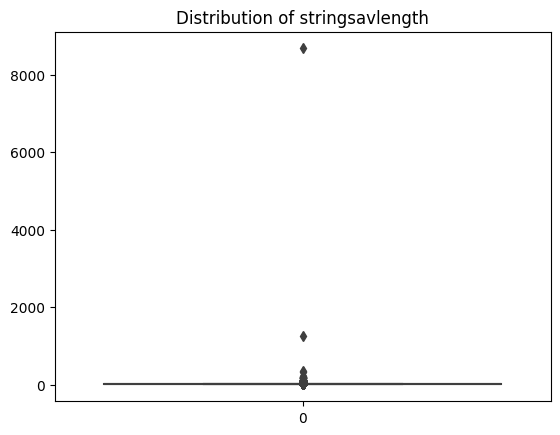

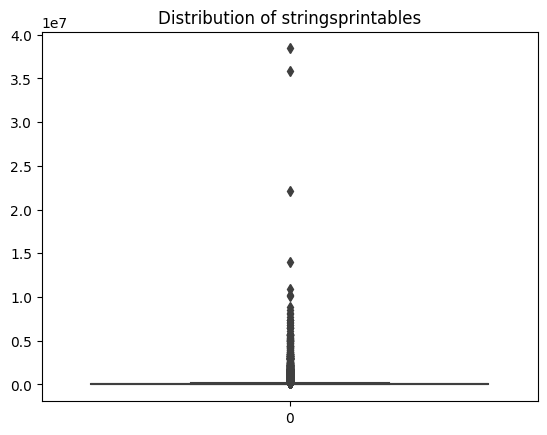

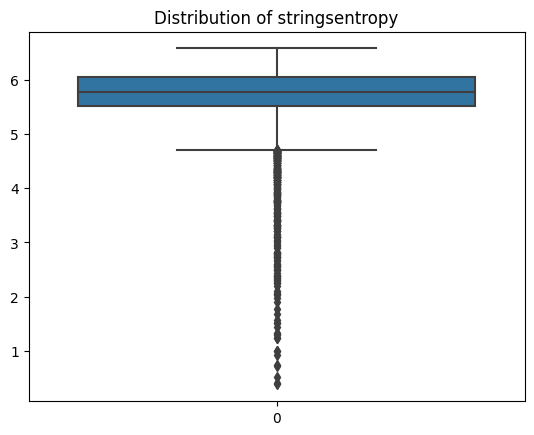

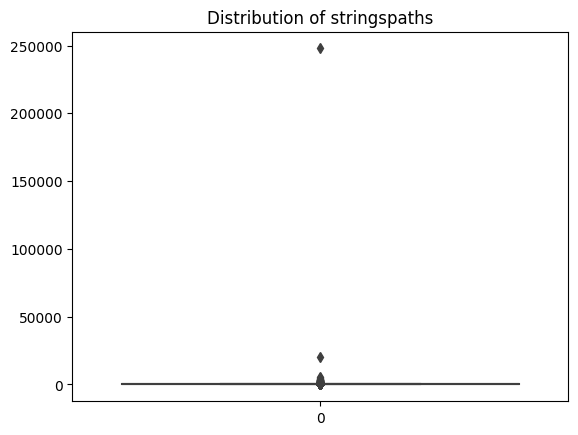

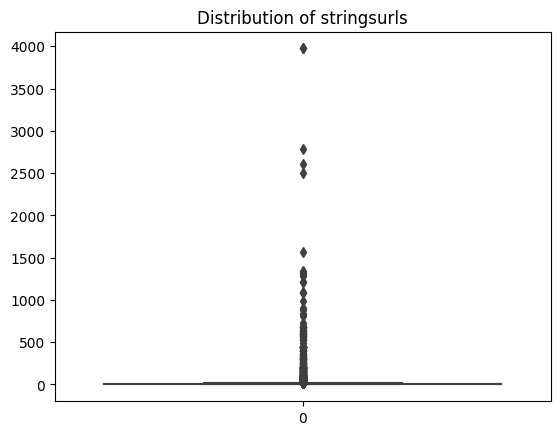

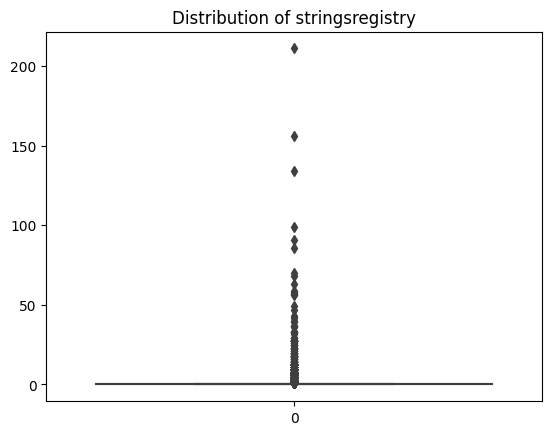

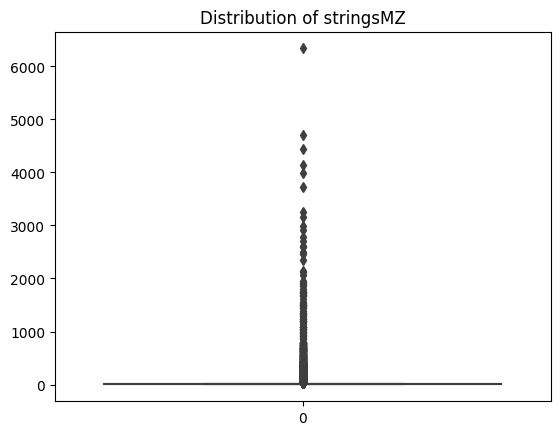

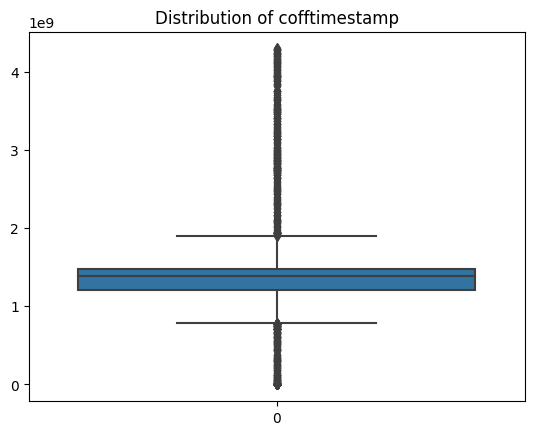

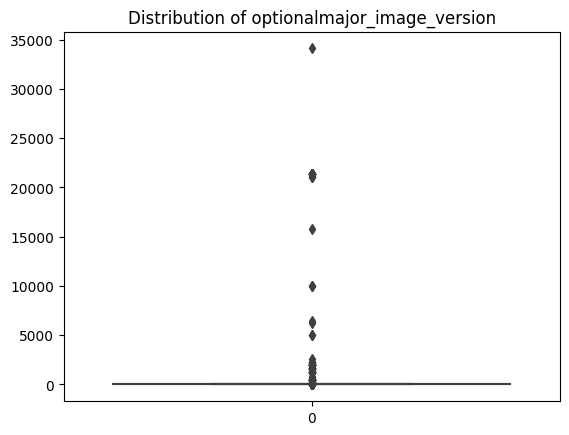

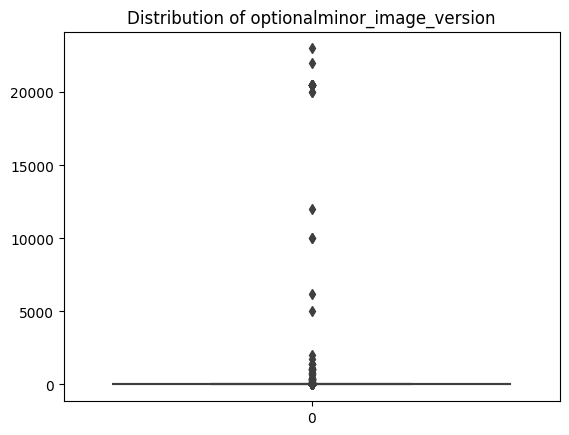

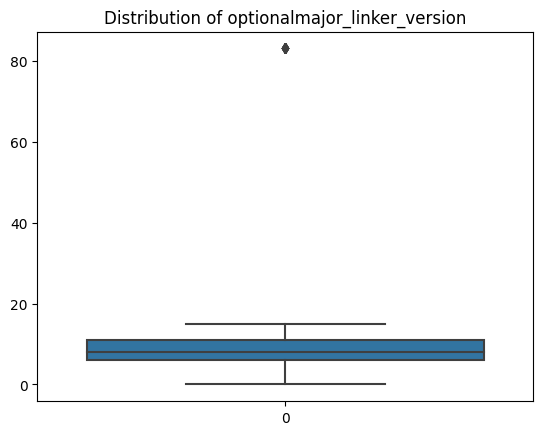

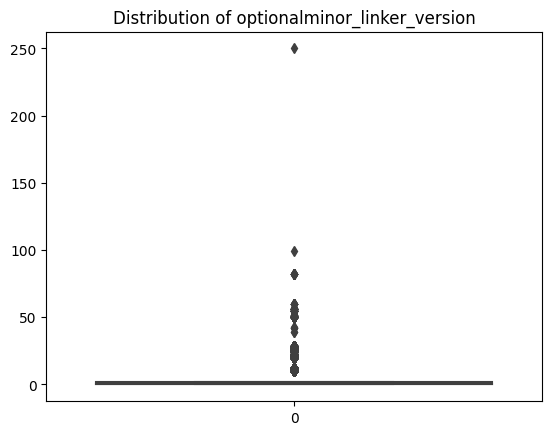

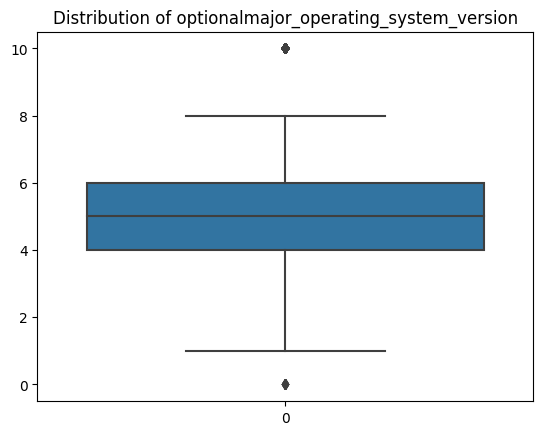

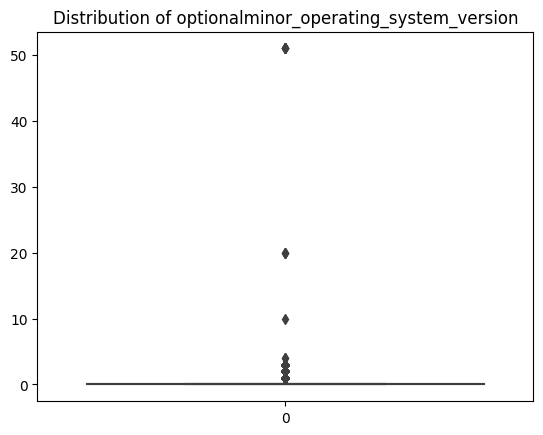

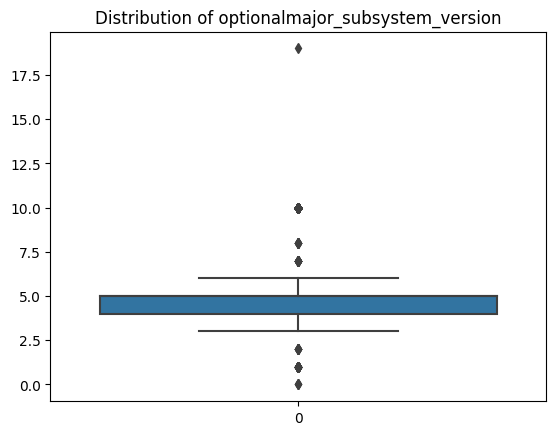

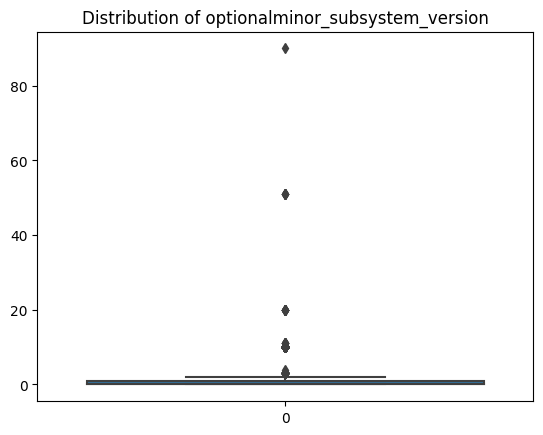

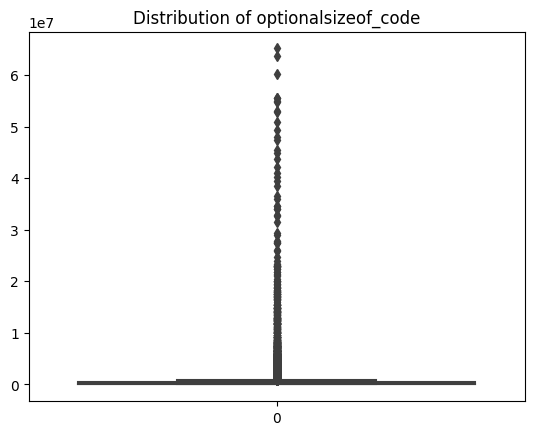

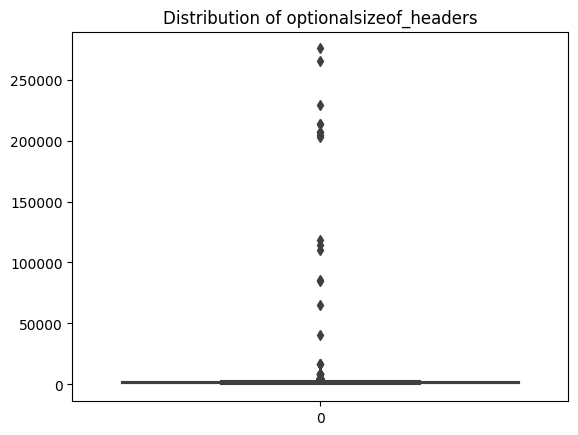

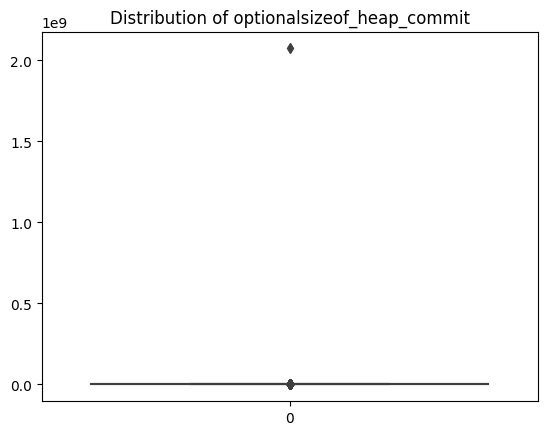

In [20]:


for column in df_training.columns:
    sns.boxplot(df_training[column])
    plt.title(f'Distribution of {column}')
    plt.show()

# Training and Testing Data Split

## Load from CSV

In [8]:
#load from csv to df
df_training_standardized = pd.read_csv('../filtered-data/standardized/training.csv')
df_testing_standardized = pd.read_csv('../filtered-data/standardized/testing.csv')


In [4]:
key = 'machine'
pd.set_option('display.max_columns', 5)
print(df_testing_standardized.loc[0:,[column  for column in df_testing_standardized.columns if key in column]].transpose())
pd.reset_option('max_columns')
# print([column  for column in df_testing_standardized.columns if key in column])

                0      1       ... 110277 110278
machine_???      False  False  ...  False  False
machine_AMD64    False  False  ...  False  False
machine_ARM      False  False  ...  False  False
machine_ARMNT    False  False  ...  False  False
machine_I386      True   True  ...   True   True
machine_IA64     False  False  ...  False  False
machine_MIPSFPU      0      0  ...      0      0
machine_POWERPC  False  False  ...  False  False
machine_R4000    False  False  ...  False  False
machine_SH3      False  False  ...  False  False
machine_SH4          0      0  ...      0      0
machine_THUMB    False  False  ...  False  False

[12 rows x 110279 columns]


In [9]:
def train_test_split_from_dataframe(df_training, df_testing):
    y_train = df_training['label']
    X_train = df_training.drop('label', axis=1)

    y_test = df_testing['label']
    X_test = df_testing.drop('label', axis=1)

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split_from_dataframe(df_training_standardized, df_testing_standardized)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
X_val = X_val.astype(np.float32)



## No val

In [43]:
def train_test_split_from_dataframe(df_training, df_testing):
    y_train = df_training['label']
    X_train = df_training.drop('label', axis=1)

    y_test = df_testing['label']
    X_test = df_testing.drop('label', axis=1)

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split_from_dataframe(df_training_standardized, df_testing_standardized)

In [10]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape,X_val.shape,y_val.shape


((246766, 60), (246766,), (110279, 60), (110279,), (61692, 60), (61692,))

# Random Forest Classifier  

In [6]:

rf = RandomForestClassifier(n_estimators=100, n_jobs=50, random_state=42, verbose=1, criterion='entropy',warm_start=True)

rf.fit(X_train, y_train)

[Parallel(n_jobs=50)]: Using backend ThreadingBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done 100 out of 100 | elapsed:    4.4s finished


RandomForestClassifier(criterion='entropy', n_jobs=50, random_state=42,
                       verbose=1, warm_start=True)

In [7]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

[Parallel(n_jobs=50)]: Using backend ThreadingBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done 100 out of 100 | elapsed:    0.1s finished


Accuracy: 0.9356087741093045


## Graphs

In [54]:
# Create a function to plot learning curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Assuming you have defined rf and your data (X_train, y_train)
title = "Learning Curves (Random Forest)"
plot_learning_curve(rf, title, X_train, y_train, cv=5, n_jobs=68)
plt.show()


Exception ignored in: <function _releaseLock at 0x7ff9f4316040>
Traceback (most recent call last):
  File "/home/sukhmeet/miniconda3/envs/tf/lib/python3.9/logging/__init__.py", line 227, in _releaseLock
    def _releaseLock():
KeyboardInterrupt: 


# Base Model Class

In [33]:

class Model:
  
  def __init__(self):
    self.model = Sequential()
  
  def addInputLayer(self,input_dim):
    self.model.add(Input(shape=(input_dim,)))
  
  def __addLayer(self,perceptrons,activation,dropout,regularizer):
    if regularizer != 0:
      self.model.add(Dense(perceptrons,activation=activation,kernel_regularizer=regularizers.l2(regularizer)))
    else:
      self.model.add(Dense(perceptrons,activation=activation))
    
    if(dropout !=0):
      self.model.add(Dropout(dropout))

  
  def addLayers(self,layers, activation_functions,dropouts=[],regularizers=[]):
    while len(regularizers) < len(layers):
      regularizers.append(0)
    while len(activation_functions) < len(layers):
      activation_functions.append('sigmoid')
    
    while(len(dropouts)< len(layers)):
      dropouts.append(0)
    for (perceptrons,activation,dropout,regularizer) in zip(layers,activation_functions,dropouts,regularizers):
      self.__addLayer(perceptrons,activation,dropout,regularizer)
    
  def compile(self):
    self.model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
  def get_model(self):
    # self.model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return self.model
  
  def fit(self,X_train=X_train, y_train=y_train, epochs=100, batch_size=2048, validation_data=(X_val, y_val)):
    self.history = self.model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=validation_data, verbose=1)
    
  def predict(self,X_test= X_test,y_test = y_test):
    y_pred = self.model.predict(X_test)
    y_pred_real = [int(round(x[0])) for x in y_pred]
    y_pred_real = np.array(y_pred_real)
    return y_pred_real

    

In [34]:

layers = [50,25,12,1]
activations = ['relu','relu','relu','sigmoid']
dropouts = [0.2,0.2,0.2]
regularizers_1 = [0.01,0.01]
model_1 = Model()
model_1.addInputLayer(X_train.shape[1])
model_1.addLayers(layers,activations,dropouts,regularizers_1)
model_1.compile()
model_1.fit()


Epoch 1/100
121/121 [==============================] - 3s 9ms/step - loss: 1.1543 - accuracy: 0.6222 - val_loss: 0.8055 - val_accuracy: 0.7045
Epoch 2/100
121/121 [==============================] - 1s 8ms/step - loss: 0.7082 - accuracy: 0.7243 - val_loss: 0.5894 - val_accuracy: 0.7647
Epoch 3/100
121/121 [==============================] - 1s 8ms/step - loss: 0.5683 - accuracy: 0.7732 - val_loss: 0.5047 - val_accuracy: 0.8074
Epoch 4/100
121/121 [==============================] - 1s 7ms/step - loss: 0.5162 - accuracy: 0.7979 - val_loss: 0.4702 - val_accuracy: 0.8210
Epoch 5/100
121/121 [==============================] - 1s 8ms/step - loss: 0.4928 - accuracy: 0.8089 - val_loss: 0.4493 - val_accuracy: 0.8309
Epoch 6/100
121/121 [==============================] - 1s 8ms/step - loss: 0.4774 - accuracy: 0.8166 - val_loss: 0.4350 - val_accuracy: 0.8381
Epoch 7/100
121/121 [==============================] - 1s 8ms/step - loss: 0.4661 - accuracy: 0.8220 - val_loss: 0.4246 - val_accuracy: 0.8410

KeyboardInterrupt: 

In [69]:
y_pred = model_1.model.predict(X_test)

y_pred_real = [int(round(x[0])) for x in y_pred]
y_pred_real = np.array(y_pred_real)

accuracy_score(y_test, y_pred_real)

3447/3447 [==============================] - 5s 1ms/step


0.8434788128292785

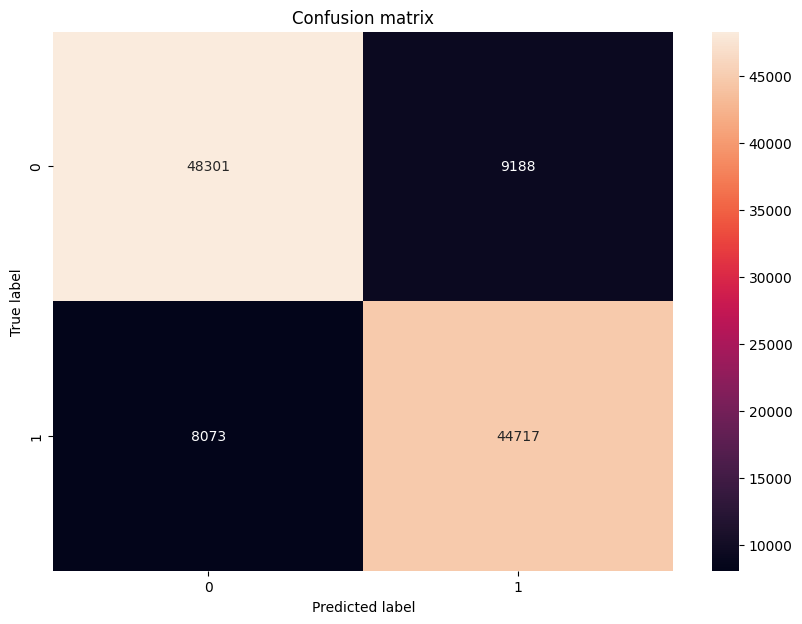

In [70]:
def plot_confusion_matrix(y_true, y_pred, labels, title):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=True, fmt='g')
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
  
plot_confusion_matrix(y_test, y_pred_real, labels=[0, 1], title='Confusion matrix')

In [39]:
#get training loss
def plot_loss_curves(history):
  train_loss = history.history['loss']
  #get validation loss
  val_loss = history.history['val_loss']
  #plot graph

  plt.plot(train_loss, label='Training Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend()
  plt.show()


# K Fold

In [36]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
models = []

layers = [100,100,100,1]
activations = ['relu','relu','relu','sigmoid']
dropouts = [0.2,0.2,0.2]
regularizers_1 = [0.01,0.01]
for i in range(10):
    model_1 = Model()
    model_1.addInputLayer(X_train.shape[1])
    model_1.addLayers(layers,activations,dropouts,regularizers_1)
    model_1.compile()
    models.append(model_1)
i = 0
for train_index, val_index in skf.split(X_train, y_train):
    
    x_train_fold, x_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    models[i].fit(x_train_fold,y_train_fold,validation_data=(x_val_fold,y_val_fold))
    i+=1

  

Epoch 1/100
109/109 [==============================] - 2s 9ms/step - loss: 1.4239 - accuracy: 0.6821 - val_loss: 0.7766 - val_accuracy: 0.7590
Epoch 2/100
109/109 [==============================] - 1s 8ms/step - loss: 0.6529 - accuracy: 0.7896 - val_loss: 0.4828 - val_accuracy: 0.8207
Epoch 3/100
109/109 [==============================] - 1s 8ms/step - loss: 0.4636 - accuracy: 0.8281 - val_loss: 0.4110 - val_accuracy: 0.8501
Epoch 4/100
109/109 [==============================] - 1s 8ms/step - loss: 0.4369 - accuracy: 0.8423 - val_loss: 0.4033 - val_accuracy: 0.8549
Epoch 5/100
109/109 [==============================] - 1s 8ms/step - loss: 0.4123 - accuracy: 0.8483 - val_loss: 0.3753 - val_accuracy: 0.8676
Epoch 6/100
109/109 [==============================] - 1s 8ms/step - loss: 0.4036 - accuracy: 0.8530 - val_loss: 0.3678 - val_accuracy: 0.8712
Epoch 7/100
109/109 [==============================] - 1s 7ms/step - loss: 0.3871 - accuracy: 0.8580 - val_loss: 0.3616 - val_accuracy: 0.8713

In [45]:
list1 = [2, 2, 2, 3, 4]
list2 = [2, 2, 3, 4, 4]
list3 = [1, 2, 3, 4, 4]
list4 = [2, 2, 3, 4, 4]

# Create a NumPy array from the lists
lists_array = np.array([list1, list2, list3,list4])

# Use NumPy to find the mode (most frequent element) for each index
max_freq_elements = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=lists_array)

# max_freq_elements now contains the element with the maximum frequency for each index
print(max_freq_elements)

[2 2 3 4 4]


3447/3447 [==============================] - 4s 1ms/step
0.8649062831545444


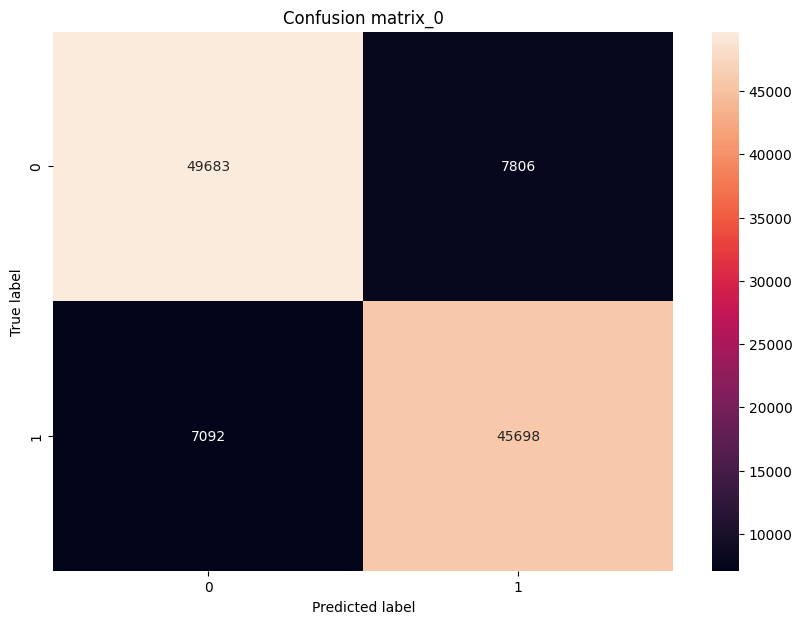

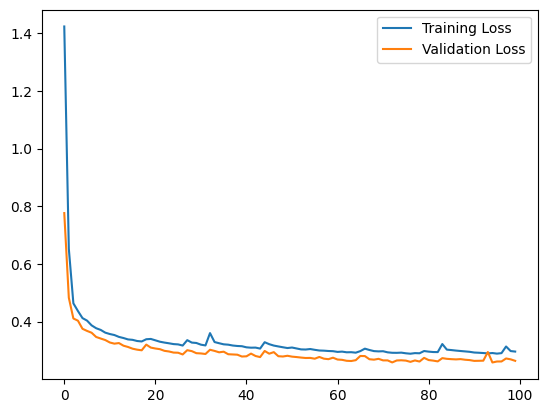

3447/3447 [==============================] - 4s 1ms/step
0.8543240326807461


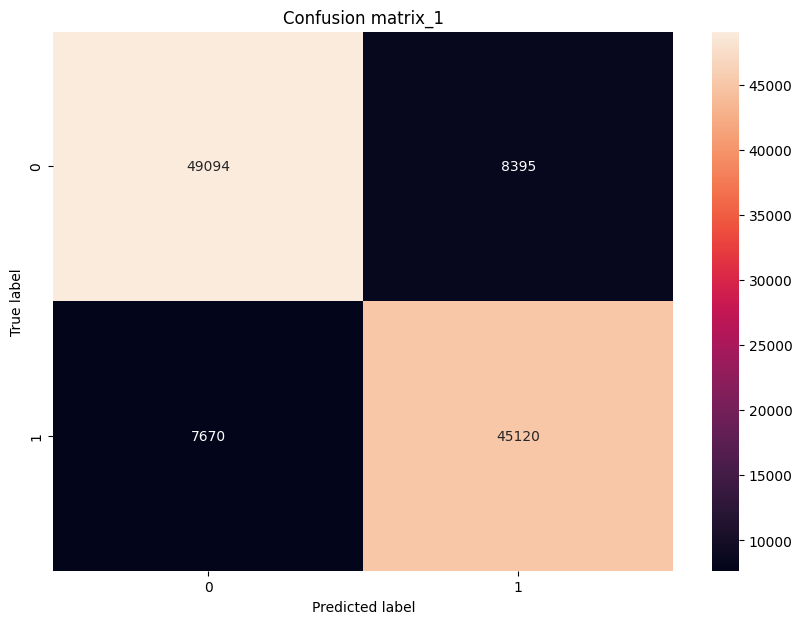

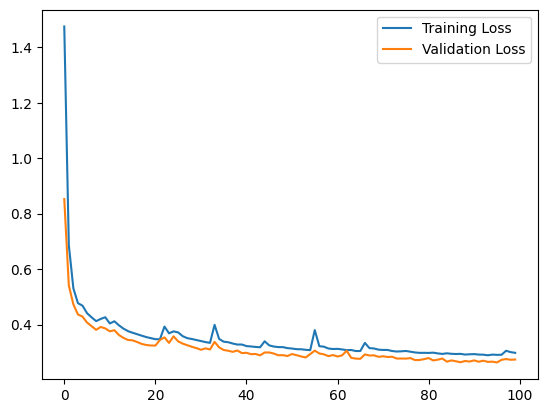

3447/3447 [==============================] - 5s 1ms/step
0.8511956038774381


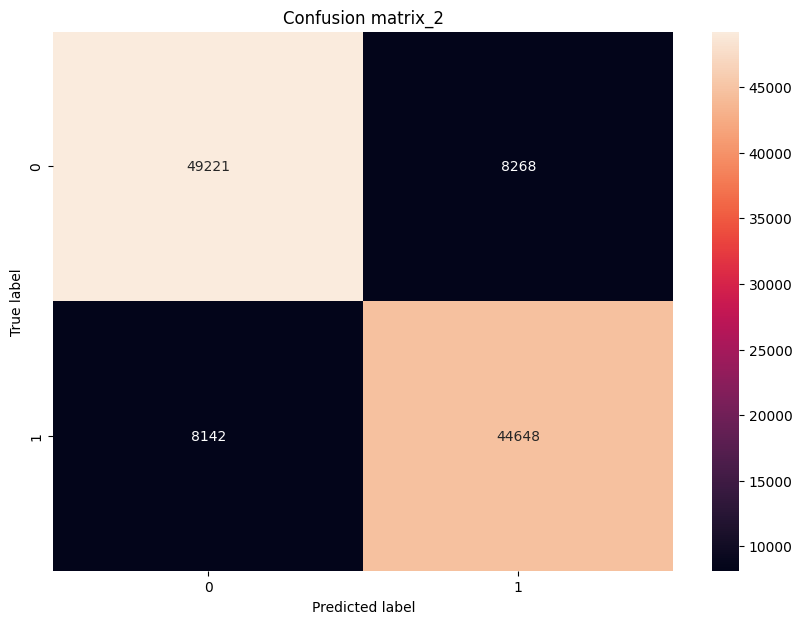

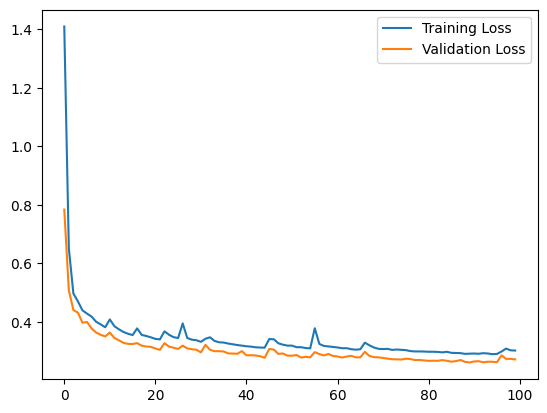

3447/3447 [==============================] - 5s 1ms/step
0.8559562564042111


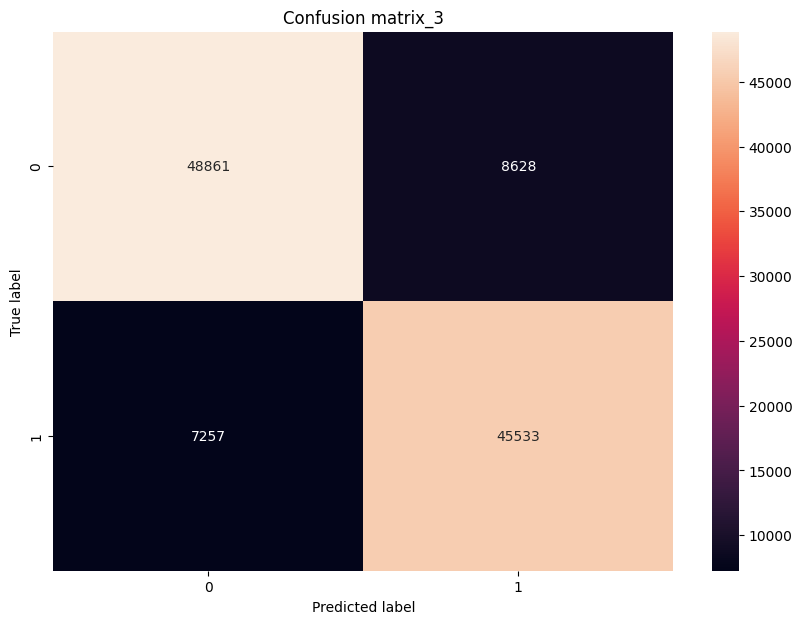

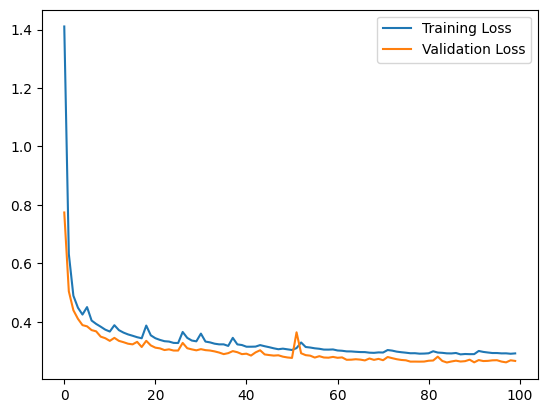

3447/3447 [==============================] - 4s 1ms/step
0.8415926876377189


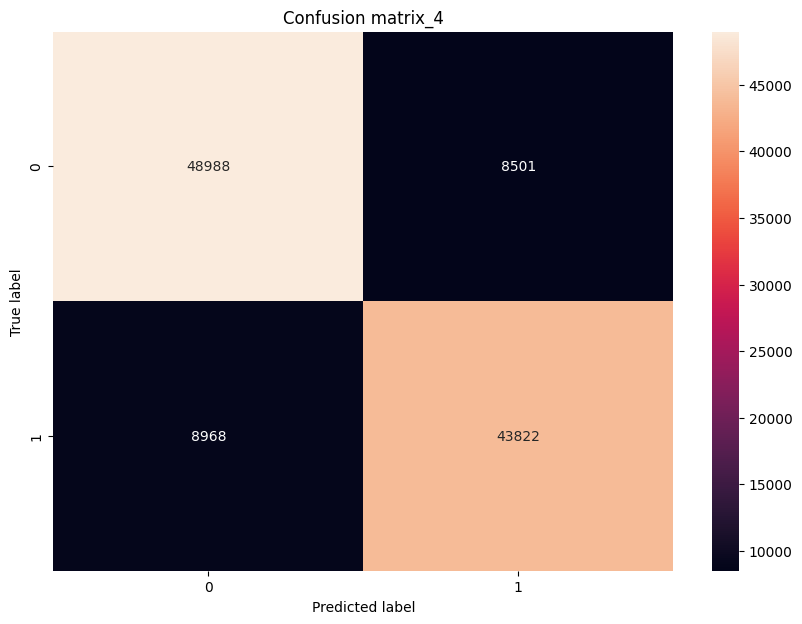

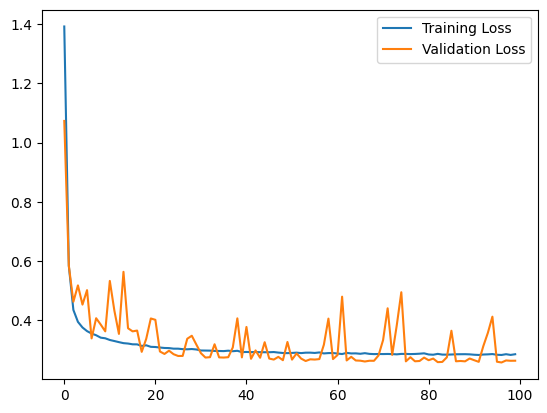

3447/3447 [==============================] - 4s 1ms/step
0.856192022053156


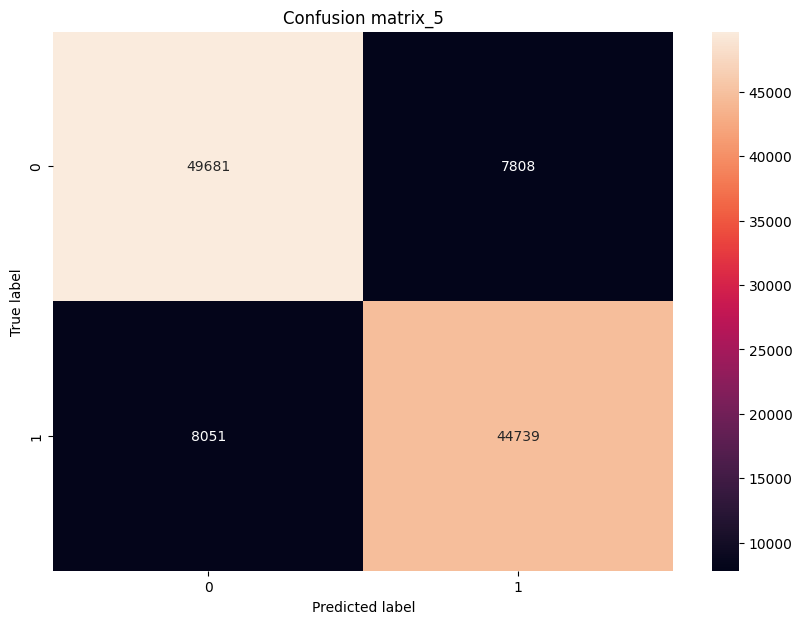

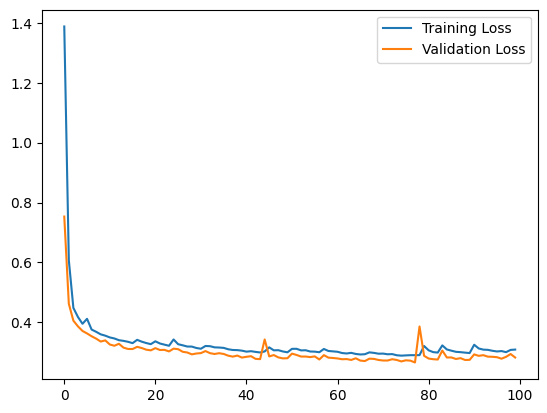

3447/3447 [==============================] - 4s 1ms/step
0.8597285067873304


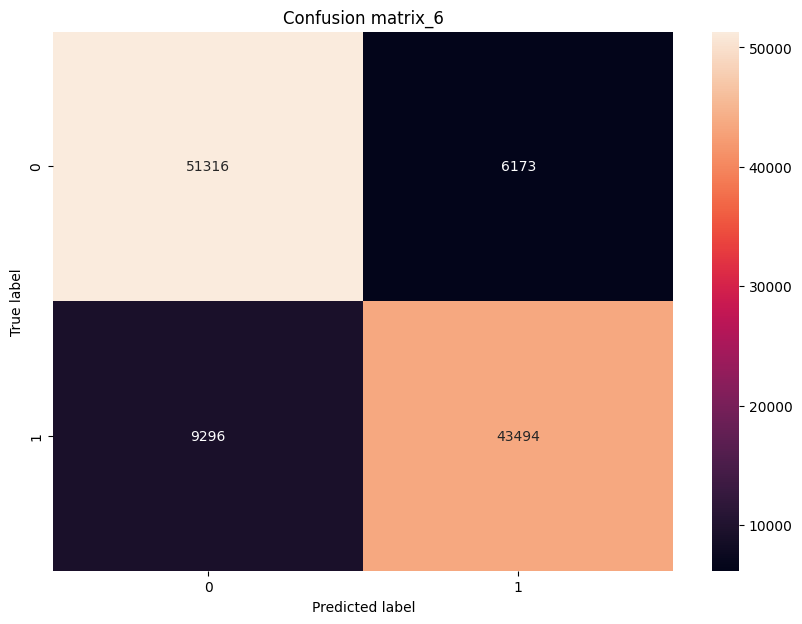

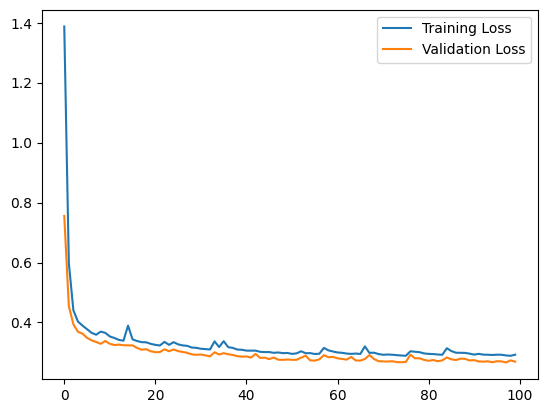

3447/3447 [==============================] - 4s 1ms/step
0.863428213893851


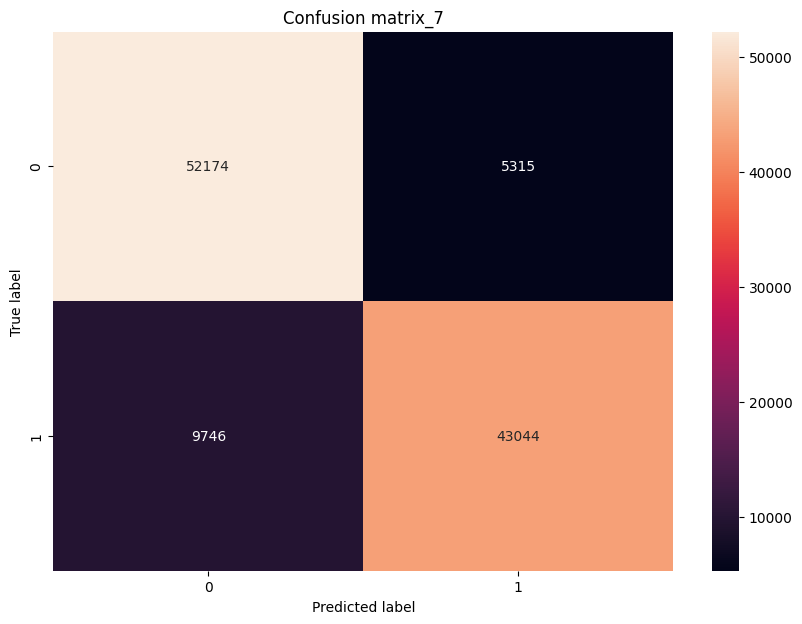

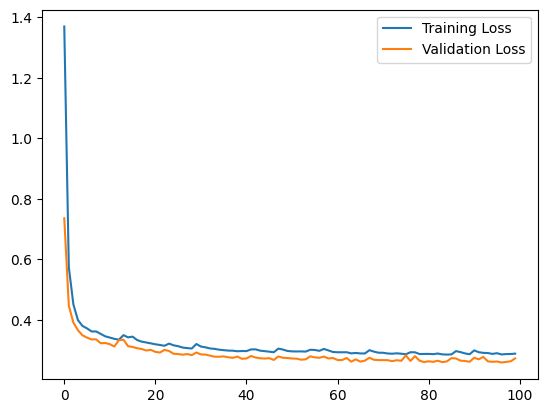

3447/3447 [==============================] - 4s 1ms/step
0.85157645607958


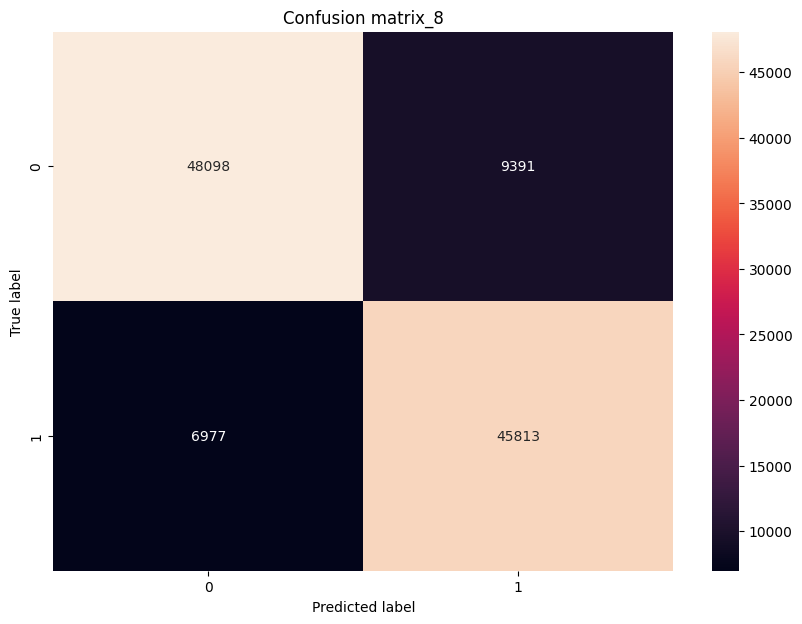

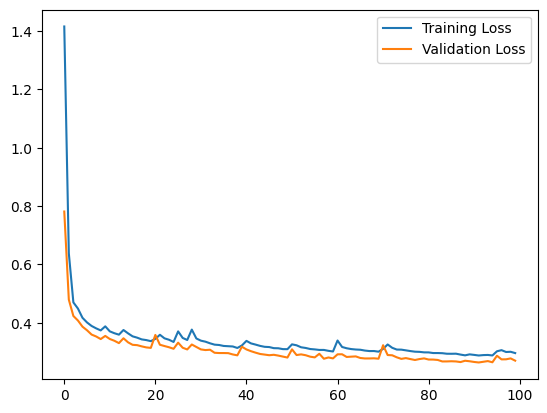

3447/3447 [==============================] - 5s 1ms/step
0.8582141658883378


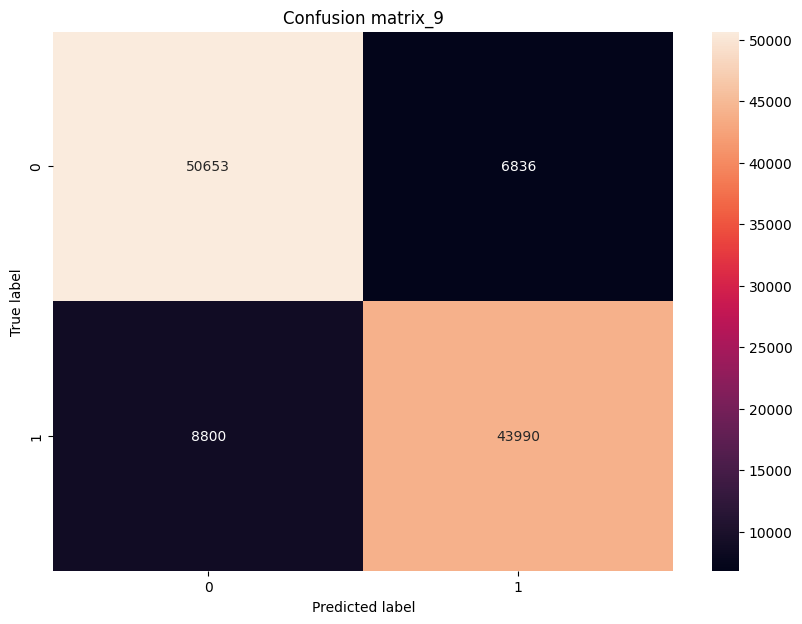

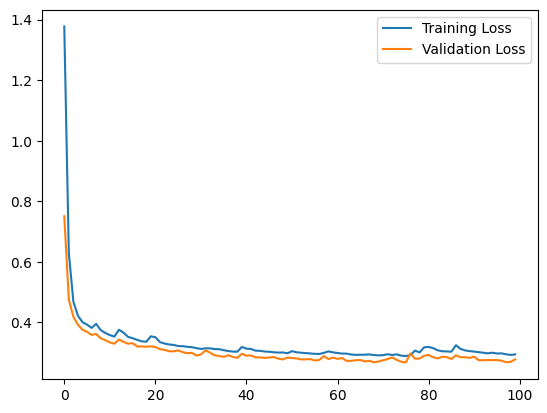

0.8662574016811905


In [47]:
y_pred_list =[]
for i,model in enumerate(models):
  y_pred_list.append(model.predict(X_test,y_test))
  print(accuracy_score(y_test,y_pred_list[-1]))
  plot_confusion_matrix(y_test, y_pred_list[-1], labels=[0, 1], title='Confusion matrix_' +str(i))
  plot_loss_curves(model.history)

y_pred_final = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=y_pred_list)

print(accuracy_score(y_test,y_pred_final))

  

0.8662574016811905


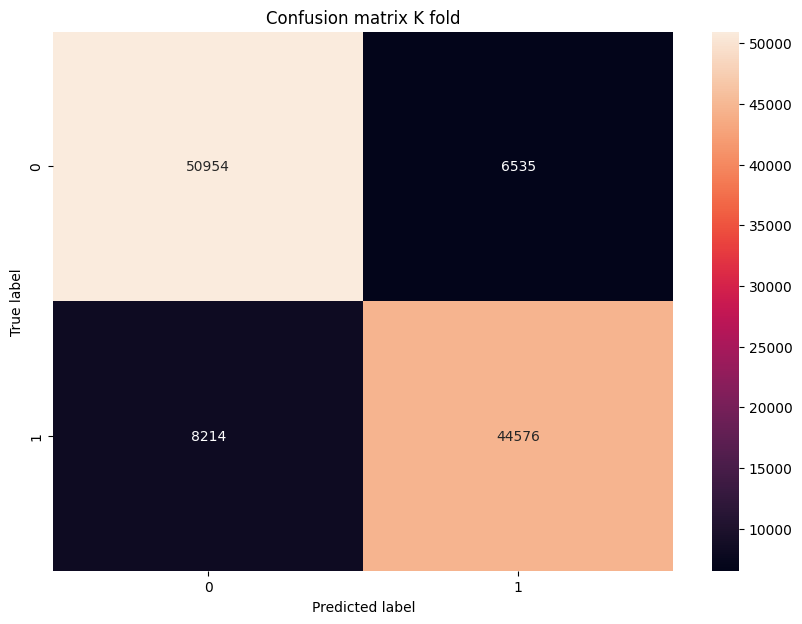

In [58]:
print(accuracy_score(y_test,y_pred_final))
plot_confusion_matrix(y_test, y_pred_final, labels=[0, 1], title='Confusion matrix K fold')


In [62]:
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87     57489
           1       0.87      0.84      0.86     52790

    accuracy                           0.87    110279
   macro avg       0.87      0.87      0.87    110279
weighted avg       0.87      0.87      0.87    110279



# Model 1 - Basic ANN

## Model

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               6100      
                                                                 
 dropout_6 (Dropout)         (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 100)               10100     
                                                                 
 dropout_7 (Dropout)         (None, 100)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
 dropout_8 (Dropout)         (None, 100)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                

Total params: 26401 (103.13 KB)
Trainable params: 26401 (103.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


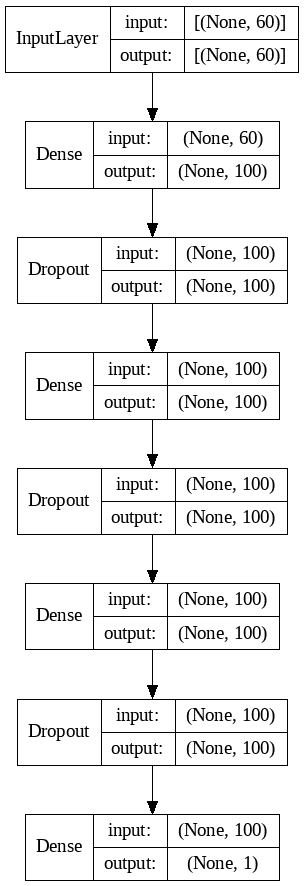

In [7]:
# write a ann model to classify 


def get_model():
    model = Sequential()
    # X_train.shape = (90164, 41)
    model.add(Dense(100, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dropout(0.2))
    model.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dropout(0.2))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    return model


def get_model_1():
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    # model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
    # model.add(Dropout(0.2))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(2, activation='relu'))
    # model.add(Dropout(0.2))
    # model.add(Dense(100, activation='relu'))
    # model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
model = get_model()
# model2 = get_model2()

print(model.summary())
tf.keras.utils.plot_model(model, show_shapes=True,show_layer_names=False)






## Compile and fit


In [67]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#validation accuracy chart



history = model.fit(X_train, y_train, epochs=100, batch_size=2048, validation_data=(X_val, y_val), verbose=1)



Epoch 1/100
121/121 [==============================] - 2s 10ms/step - loss: 1.3726 - accuracy: 0.6956 - val_loss: 0.7661 - val_accuracy: 0.7725
Epoch 2/100
121/121 [==============================] - 1s 8ms/step - loss: 0.6362 - accuracy: 0.7915 - val_loss: 0.4995 - val_accuracy: 0.8273
Epoch 3/100
121/121 [==============================] - 1s 8ms/step - loss: 0.4864 - accuracy: 0.8268 - val_loss: 0.4393 - val_accuracy: 0.8461
Epoch 4/100
121/121 [==============================] - 1s 8ms/step - loss: 0.4439 - accuracy: 0.8412 - val_loss: 0.4071 - val_accuracy: 0.8561
Epoch 5/100
121/121 [==============================] - 1s 8ms/step - loss: 0.4718 - accuracy: 0.8490 - val_loss: 0.4032 - val_accuracy: 0.8578
Epoch 6/100
121/121 [==============================] - 1s 8ms/step - loss: 0.4339 - accuracy: 0.8524 - val_loss: 0.3961 - val_accuracy: 0.8618
Epoch 7/100
121/121 [==============================] - 1s 8ms/step - loss: 0.4382 - accuracy: 0.8552 - val_loss: 0.3905 - val_accuracy: 0.867

## Save

In [27]:

# save model
model.save('../model/ember_model_ann.h5')

## Predict

In [68]:

y_pred = model.predict(X_test)

y_pred_real = [int(round(x[0])) for x in y_pred]
y_pred_real = np.array(y_pred_real)


3447/3447 [==============================] - 4s 1ms/step


In [69]:
y_test.shape, y_pred.shape,y_pred_real.shape

((110279,), (110279, 1), (110279,))

## Accuracy

In [70]:
# find accuracy of the model
accuracy_score(y_test, y_pred_real)

0.8669374948993008

## Graphs

### Confusion Matrix

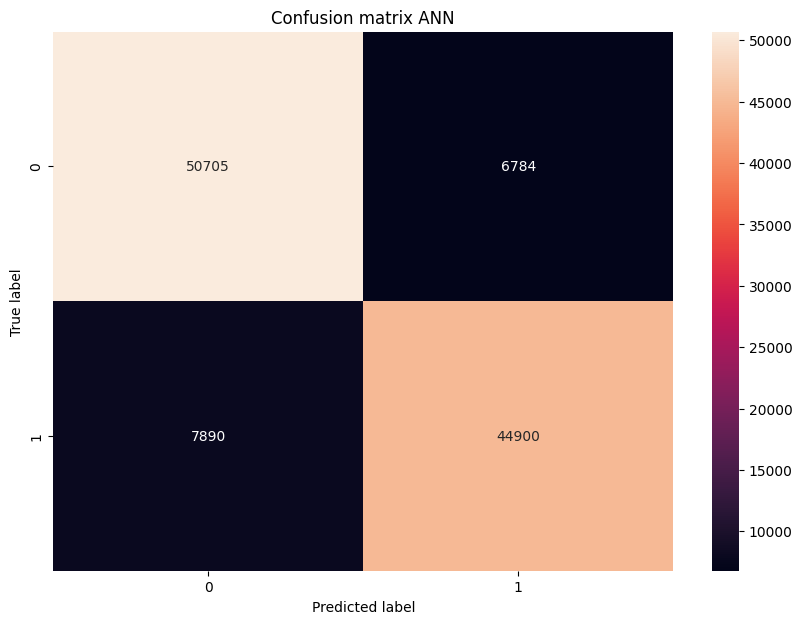

In [77]:
# confusion matrix



def plot_confusion_matrix(y_true, y_pred, labels, title):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=True, fmt='g')
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
  
plot_confusion_matrix(y_test, y_pred_real, labels=[0, 1], title='Confusion matrix ANN')

### Default Validation

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


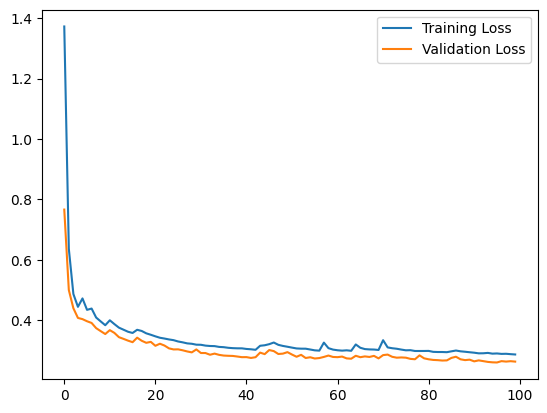

In [72]:

#get training loss
print(history.history.keys())
train_loss = history.history['loss']
#get validation loss
val_loss = history.history['val_loss']
#plot graph

plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.show()


## F1 scores and somethings

In [73]:
# Confusion matrix
confusion_matrix_output = confusion_matrix(y_test, y_pred_final, labels=[0, 1])

# Calculate true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN)
TP = confusion_matrix_output[1, 1]
TN = confusion_matrix_output[0, 0]
FP = confusion_matrix_output[0, 1]
FN = confusion_matrix_output[1, 0]

print(TP)


# Calculate accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Calculate precision
precision = TP / (TP + FP)

# Calculate recall (sensitivity)
recall = TP / (TP + FN)

# Calculate F1-score
f1_score = 2 * (precision * recall) / (precision + recall)

# Calculate specificity (true negative rate)
specificity = TN / (TN + FP)

# Calculate MCC with overflow handling
numerator = (TP * TN - FP * FN)
denominator = np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))

# Avoid division by zero and handle overflow/underflow
if denominator == 0:
    mcc = 0  # Handle division by zero
else:
    mcc = numerator / denominator

# Print the calculated MCC
# Print the calculated metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")
print(f"Specificity (True Negative Rate): {specificity:.4f}")


44576
Accuracy: 0.8663
Precision: 0.8721
Recall (Sensitivity): 0.8444
F1-Score: 0.8580
Specificity (True Negative Rate): 0.8863


In [74]:

#get training loss
print(model.history.history.keys())
train_loss = model.history.history['loss']
#get validation loss
val_loss = model.history.history['val_loss']
#plot graph

plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.show()


dict_keys([])


KeyError: 'loss'

In [76]:
print(classification_report(y_test,y_pred_real))
print(accuracy_score(y_test,y_pred_real))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87     57489
           1       0.87      0.85      0.86     52790

    accuracy                           0.87    110279
   macro avg       0.87      0.87      0.87    110279
weighted avg       0.87      0.87      0.87    110279

0.8669374948993008


#  Ensemble Model - Adaboost

## Model

In [25]:

def get_model():
    model = Sequential()
    # X_train.shape = (90164, 41)
    model.add(Dense(100, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model



model= KerasClassifier(model=get_model, epochs=100, batch_size=2048, verbose=1)

ada_model = AdaBoostClassifier(estimator=model, n_estimators=10, random_state=42, algorithm='SAMME')

# pipeline = Pipeline([('transformer', StandardScaler()), ('estimator', ada_model)])




## Training

In [26]:

# pipeline.fit(X_train, y_train)

ada_model.fit(X_train, y_train)


Epoch 1/100
121/121 [==============================] - 2s 7ms/step - loss: 2.7993e-06 - accuracy: 0.5416
Epoch 2/100
121/121 [==============================] - 1s 7ms/step - loss: 2.6838e-06 - accuracy: 0.6119
Epoch 3/100
121/121 [==============================] - 1s 7ms/step - loss: 2.5290e-06 - accuracy: 0.6544
Epoch 4/100
121/121 [==============================] - 1s 7ms/step - loss: 2.4102e-06 - accuracy: 0.6779
Epoch 5/100
121/121 [==============================] - 1s 7ms/step - loss: 2.3260e-06 - accuracy: 0.6954
Epoch 6/100
121/121 [==============================] - 1s 7ms/step - loss: 2.2566e-06 - accuracy: 0.7099
Epoch 7/100
121/121 [==============================] - 1s 7ms/step - loss: 2.1944e-06 - accuracy: 0.7249
Epoch 8/100
121/121 [==============================] - 1s 7ms/step - loss: 2.1379e-06 - accuracy: 0.7375
Epoch 9/100
121/121 [==============================] - 1s 7ms/step - loss: 2.0952e-06 - accuracy: 0.7453
Epoch 10/100
121/121 [==============================] -

AdaBoostClassifier(algorithm='SAMME',
                   estimator=KerasClassifier(batch_size=2048, epochs=100, model=<function get_model at 0x7f775464c8b0>),
                   n_estimators=10, random_state=42)

## Save

In [26]:
joblib.dump(ada_model, '../model/ember_model_adaboost.joblib')

2023-08-29 22:41:21.334540: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,100]
	 [[{{node inputs}}]]
2023-08-29 22:41:21.350286: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,100]
	 [[{{node inputs}}]]
2023-08-29 22:41:21.530128: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,100]
	 [[{{node inputs}}]]
2023-08-29 22:41

INFO:tensorflow:Assets written to: ram://2ac75dc2abf94bf2a6fee9f78e4b0e9b/assets


INFO:tensorflow:Assets written to: ram://2ac75dc2abf94bf2a6fee9f78e4b0e9b/assets


['../model/ember_model_adaboost.joblib']

## Load model

In [27]:
model = joblib.load('../model/ember_model_adaboost.joblib')

2023-08-29 22:41:55.732406: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://df1f88c75306484784e4c4b645c1c50d: INVALID_ARGUMENT: ram://df1f88c75306484784e4c4b645c1c50d is a directory.


## Predict

In [27]:
y_pred = ada_model.predict(X_test)

54/54 [==============================] - 0s 2ms/step


## Graphs

### Confusion Matrix


0.8321983333182201


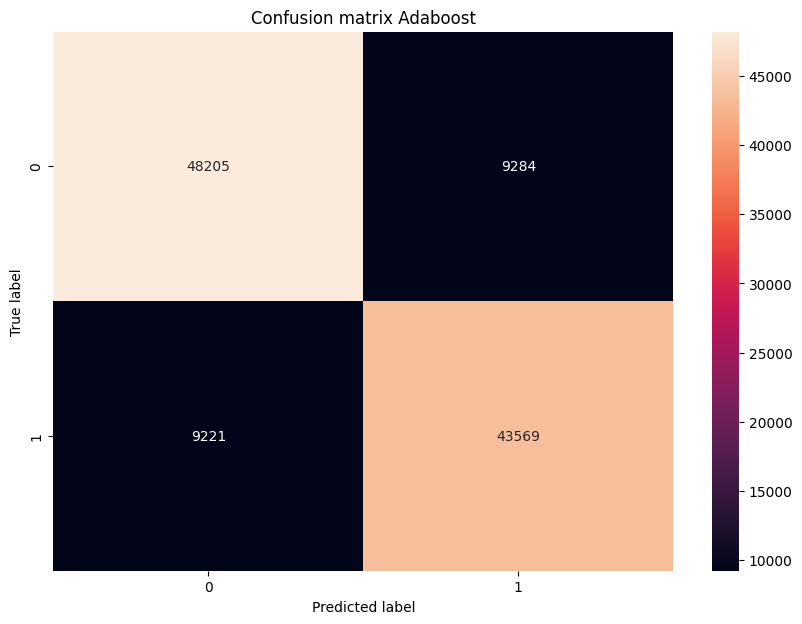

In [51]:
def plot_confusion_matrix(y_true, y_pred, labels, title):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=True, fmt='g')
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
# accuracy
print(accuracy_score(y_test, y_pred.round()))

# confusion matrix
plot_confusion_matrix(y_test, y_pred.round(), labels=[0, 1], title='Confusion matrix Adaboost')



In [64]:
print(classification_report(y_test,y_pred.round()))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84     57489
           1       0.82      0.83      0.82     52790

    accuracy                           0.83    110279
   macro avg       0.83      0.83      0.83    110279
weighted avg       0.83      0.83      0.83    110279



### Learning curves

In [ ]:
# train_sizes, train_scores, test_scores = learning_curve(ada_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50), verbose=1,n_iter=10)
# plt.plot(train_sizes,np.mean(train_scores,axis=1))


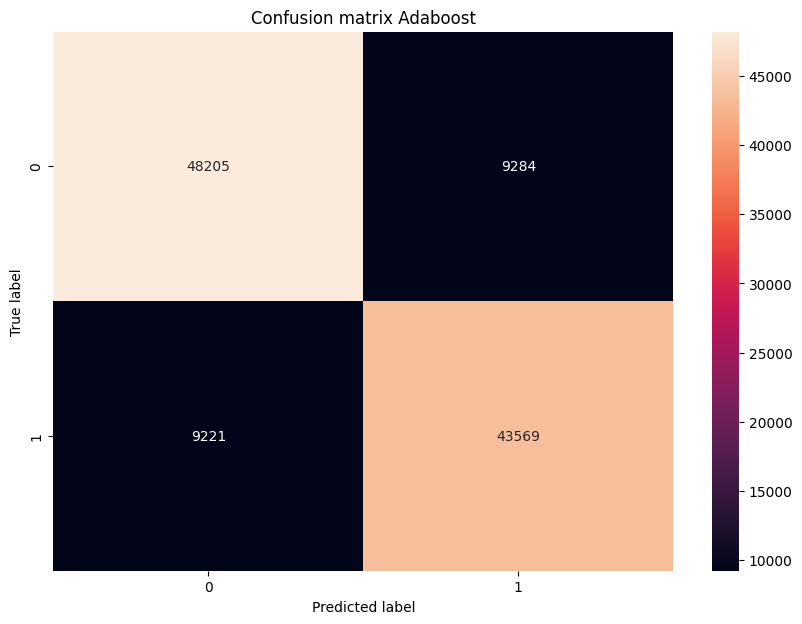

In [12]:
def plot_confusion_matrix( labels, title):
    # cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm = np.array([[48205,9284],[9221,43569]],np.int32)
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=True, fmt='g')
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
# accuracy
# print(accuracy_score(y_test, y_pred.round()))

# confusion matrix
plot_confusion_matrix(labels=[0, 1], title='Confusion matrix Adaboost')
